This project is still to go.
This project is written with an IDE in dark theme.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from charset_normalizer import models
%matplotlib inline
from datetime import datetime, date, time
import math
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn import metrics, linear_model, tree, naive_bayes, neighbors, ensemble, neural_network, svm
from rulefit import RuleFit
import statsmodels.api as sm
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.perf import ROC


In [2]:
df = pd.read_csv('dataset_SCL.csv', encoding = 'Latin-1', low_memory=False)

# Data Preparation

## Dataset review

In [3]:
df.shape

(68206, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÃO       68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## Looking for NaN values

In [5]:
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÃO         0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

It seems there is one row with nan value in Vlo-O column lets take a look at that row

In [6]:
df[df['Vlo-O'].isnull()]

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
6068  2017-01-19 11:00:00   200  SCEL  SPJC   LAW  2017-01-19 11:03:00   NaN   

     Ori-O Des-O Emp-O  DIA  MES  AÃO  DIANOM TIPOVUELO  \
6068  SCEL  SPJC   56R   19    1  2017  Jueves         I   

                     OPERA  SIGLAORI SIGLADES  
6068  Latin American Wings  Santiago     Lima

We can delete it.

In [7]:
df.dropna(inplace=True)

## Changing column names to easier names

In [8]:
df.rename(columns={'Fecha-I':'sch_fl_time', 'Vlo-I':'sch_fl_no', 'Ori-I':'pr_ori_city_c', 'Des-I':'pr_des_city_c', 'Emp-I':'sch_fl_airline_c', 'Fecha-O':'op_fl_time', 'Vlo-O':'op_fl_no', 'Ori-O':'op_ori_city_c', 'Des-O':'op_des_city_c', 'Emp-O':'op_fl_airline_c', 'DIA':'fl_op_day_in_m', 'MES': 'fl_op_mo', 'AÃO':'fl_op_yr', 'DIANOM':'fl_op_day_in_w', 'TIPOVUELO':'fl_type', 'OPERA':'op_airline', 'SIGLAORI':'ori_city', 'SIGLADES':'des_city'}, inplace=True)

In [9]:
df.head(5)

sch_fl_time sch_fl_no pr_ori_city_c pr_des_city_c sch_fl_airline_c  \
0  2017-01-01 23:30:00       226          SCEL          KMIA              AAL   
1  2017-01-02 23:30:00       226          SCEL          KMIA              AAL   
2  2017-01-03 23:30:00       226          SCEL          KMIA              AAL   
3  2017-01-04 23:30:00       226          SCEL          KMIA              AAL   
4  2017-01-05 23:30:00       226          SCEL          KMIA              AAL   

            op_fl_time op_fl_no op_ori_city_c op_des_city_c op_fl_airline_c  \
0  2017-01-01 23:33:00      226          SCEL          KMIA             AAL   
1  2017-01-02 23:39:00      226          SCEL          KMIA             AAL   
2  2017-01-03 23:39:00      226          SCEL          KMIA             AAL   
3  2017-01-04 23:33:00      226          SCEL          KMIA             AAL   
4  2017-01-05 23:28:00      226          SCEL          KMIA             AAL   

   fl_op_day_in_m  fl_op_mo  fl_op_yr fl_op_day_in_w fl_type  \
0               1         1      2017        Domingo       I   
1               2         1      2017          Lunes       I   
2               3         1      2017         Martes       I   
3               4         1      2017      Miercoles       I   
4               5         1      2017         Jueves       I   

          op_airline  ori_city des_city  
0  American Airlines  Santiago    Miami  
1  American Airlines  Santiago    Miami  
2  American Airlines  Santiago    Miami  
3  American Airlines  Santiago    Miami  
4  American Airlines  Santiago    Miami

In [10]:
df.columns

Index(['sch_fl_time', 'sch_fl_no', 'pr_ori_city_c', 'pr_des_city_c',
       'sch_fl_airline_c', 'op_fl_time', 'op_fl_no', 'op_ori_city_c',
       'op_des_city_c', 'op_fl_airline_c', 'fl_op_day_in_m', 'fl_op_mo',
       'fl_op_yr', 'fl_op_day_in_w', 'fl_type', 'op_airline', 'ori_city',
       'des_city'],
      dtype='object')

## Reformatting columns with datetime objects

In [11]:
# I know the flight day, month, year, and flight day in week were already provided, but I was more confident to do this change of format to the columns of time
df['sch_fl_time'] = pd.to_datetime(df['sch_fl_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)
df['op_fl_time'] = pd.to_datetime(df['op_fl_time'], format='%Y-%m-%d %H:%M:%S.%f', utc=False)

## Sorting the dataset based on the scheduled flight time

In [12]:
df.sort_values(by='sch_fl_time', inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.head(5)

sch_fl_time sch_fl_no pr_ori_city_c pr_des_city_c sch_fl_airline_c  \
0 2017-01-01 00:15:00        11          SCEL          MMMX              AMX   
1 2017-01-01 01:15:00       572          SCEL          SKBO              LAN   
2 2017-01-01 01:23:00       495          SCEL          MPTO              CMP   
3 2017-01-01 01:33:00       240          SCEL          SKBO              AVA   
4 2017-01-01 01:42:00       276          SCEL          MPTO              CMP   

           op_fl_time op_fl_no op_ori_city_c op_des_city_c op_fl_airline_c  \
0 2017-01-01 00:04:00       11          SCEL          MMMX             AMX   
1 2017-01-01 01:10:00      572          SCEL          SKBO             LAN   
2 2017-01-01 01:29:00      495          SCEL          MPTO             CMP   
3 2017-01-01 01:38:00      240          SCEL          SKBO             AVA   
4 2017-01-01 01:40:00      276          SCEL          MPTO             CMP   

   fl_op_day_in_m  fl_op_mo  fl_op_yr fl_op_day_in_w fl_type   op_airline  \
0               1         1      2017        Domingo       I   Aeromexico   
1               1         1      2017        Domingo       I  Grupo LATAM   
2               1         1      2017        Domingo       I     Copa Air   
3               1         1      2017        Domingo       I      Avianca   
4               1         1      2017        Domingo       I     Copa Air   

   ori_city          des_city  
0  Santiago  Ciudad de Mexico  
1  Santiago            Bogota  
2  Santiago  Ciudad de Panama  
3  Santiago            Bogota  
4  Santiago  Ciudad de Panama

Being a hub airport is important, it means if it is connected to many routes so travellers can have lay over there and also if airplanes can park there too or not. Below are the unique code names of the airports, having value of 1 or 0 is based on being a hub airport or not.

In [14]:
# This dictionary of being a hub airport or not is provided by online searching for each of these airports, 1 if they are a hub, 0 if they are not

dic_hub_airports = {'SCFA':1, 'SPJC':1, 'SCCF':0, 'SCTE':0, 'SCIE':0, 'SCDA':0, 'SBGR':1, 'SAEZ':1, 'SABE':1,
       'SCQP':1, 'SCAR':0, 'SCSE':1, 'SCCI':1, 'MPTO':1, 'SCAT':0, 'SAME':0, 'SKBO':1, 'SBGL':1,
       'SUMU':0, 'SACO':0, 'KMIA':1, 'LEMD':1, 'SCBA':0, 'SCVD':0, 'MMMX':1, 'SCIP':0, 'SEGU':1,
       'KJFK':1, 'NZAA':1, 'LFPG':1, 'KATL':1, 'KDFW':1, 'KIAH':1, 'CYYZ':1, 'SCJO':0, 'LIRF':1,
       'SCPQ':0, 'SGAS':1, 'SLLP':1, 'EGLL':1, 'YSSY':1, 'SBFL':0, 'KLAX':1, 'SAAR':0, 'SLVR':1,
       'SCNT':0, 'MMUN':1, 'MDPC':0, 'YMML':1, 'SANT':0, 'SAZN':0, 'SANU':0, 'KMCO':1, 'SAWH':0,
       'SULS':1, 'SBCT':1, 'SBFI':0, 'SAZS':0, 'SEQM':1, 'KIAD':1, 'SPSO':0, 'EGYP':0, 'SLCB':1, 'SARI':0, 'SEQU':1}

Let's add this feature to our dataset

In [15]:
df['is_hub'] = np.zeros(len(df)).astype(int)
for key, value in dic_hub_airports.items():
       df.loc[df['op_des_city_c'] == key, 'is_hub'] = value

## Making a new column with the calculated flight delay time

A new column named as delay_time is added to the end of the dataset, it contains the differences between the operated flight time (op_fl_time) and scheduled flight time (sch_fl_time) for each flight

In [16]:
fl_delay_time = df['op_fl_time'].sub(df['sch_fl_time']).dt.total_seconds()
# df = df.assign(delay_time_s = fl_delay_time)
df = df.assign(delay_time_m = fl_delay_time/60)

In [17]:
df.head(5)

sch_fl_time sch_fl_no pr_ori_city_c pr_des_city_c sch_fl_airline_c  \
0 2017-01-01 00:15:00        11          SCEL          MMMX              AMX   
1 2017-01-01 01:15:00       572          SCEL          SKBO              LAN   
2 2017-01-01 01:23:00       495          SCEL          MPTO              CMP   
3 2017-01-01 01:33:00       240          SCEL          SKBO              AVA   
4 2017-01-01 01:42:00       276          SCEL          MPTO              CMP   

           op_fl_time op_fl_no op_ori_city_c op_des_city_c op_fl_airline_c  \
0 2017-01-01 00:04:00       11          SCEL          MMMX             AMX   
1 2017-01-01 01:10:00      572          SCEL          SKBO             LAN   
2 2017-01-01 01:29:00      495          SCEL          MPTO             CMP   
3 2017-01-01 01:38:00      240          SCEL          SKBO             AVA   
4 2017-01-01 01:40:00      276          SCEL          MPTO             CMP   

   fl_op_day_in_m  fl_op_mo  fl_op_yr fl_op_day_in_w fl_type   op_airline  \
0               1         1      2017        Domingo       I   Aeromexico   
1               1         1      2017        Domingo       I  Grupo LATAM   
2               1         1      2017        Domingo       I     Copa Air   
3               1         1      2017        Domingo       I      Avianca   
4               1         1      2017        Domingo       I     Copa Air   

   ori_city          des_city  is_hub  delay_time_m  
0  Santiago  Ciudad de Mexico       1         -11.0  
1  Santiago            Bogota       1          -5.0  
2  Santiago  Ciudad de Panama       1           6.0  
3  Santiago            Bogota       1           5.0  
4  Santiago  Ciudad de Panama       1          -2.0

It seems some flights had early departure

# 1. How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

We first need to plot the data for each column of interest to identify the best distribution. So, first we should plot them with a histogram. We use distplot.

In [18]:
df.columns

Index(['sch_fl_time', 'sch_fl_no', 'pr_ori_city_c', 'pr_des_city_c',
       'sch_fl_airline_c', 'op_fl_time', 'op_fl_no', 'op_ori_city_c',
       'op_des_city_c', 'op_fl_airline_c', 'fl_op_day_in_m', 'fl_op_mo',
       'fl_op_yr', 'fl_op_day_in_w', 'fl_type', 'op_airline', 'ori_city',
       'des_city', 'is_hub', 'delay_time_m'],
      dtype='object')

Below we can see some histograms of delayed flights with distributions of data, as the most of the operated flights have short delay we can't properly see on what days most of delays happened, or which flight or destination city has most of delay times. In this case bubble charts are useful which comes next.

Also, we can clearly see our data has right (positive) skewness, so it does not have a normal distribution, it shows we have some outliers (delayed flights) of the distribution curve (so most of flights are not delayed) accordingly boxplots can be of great choice which comes next.

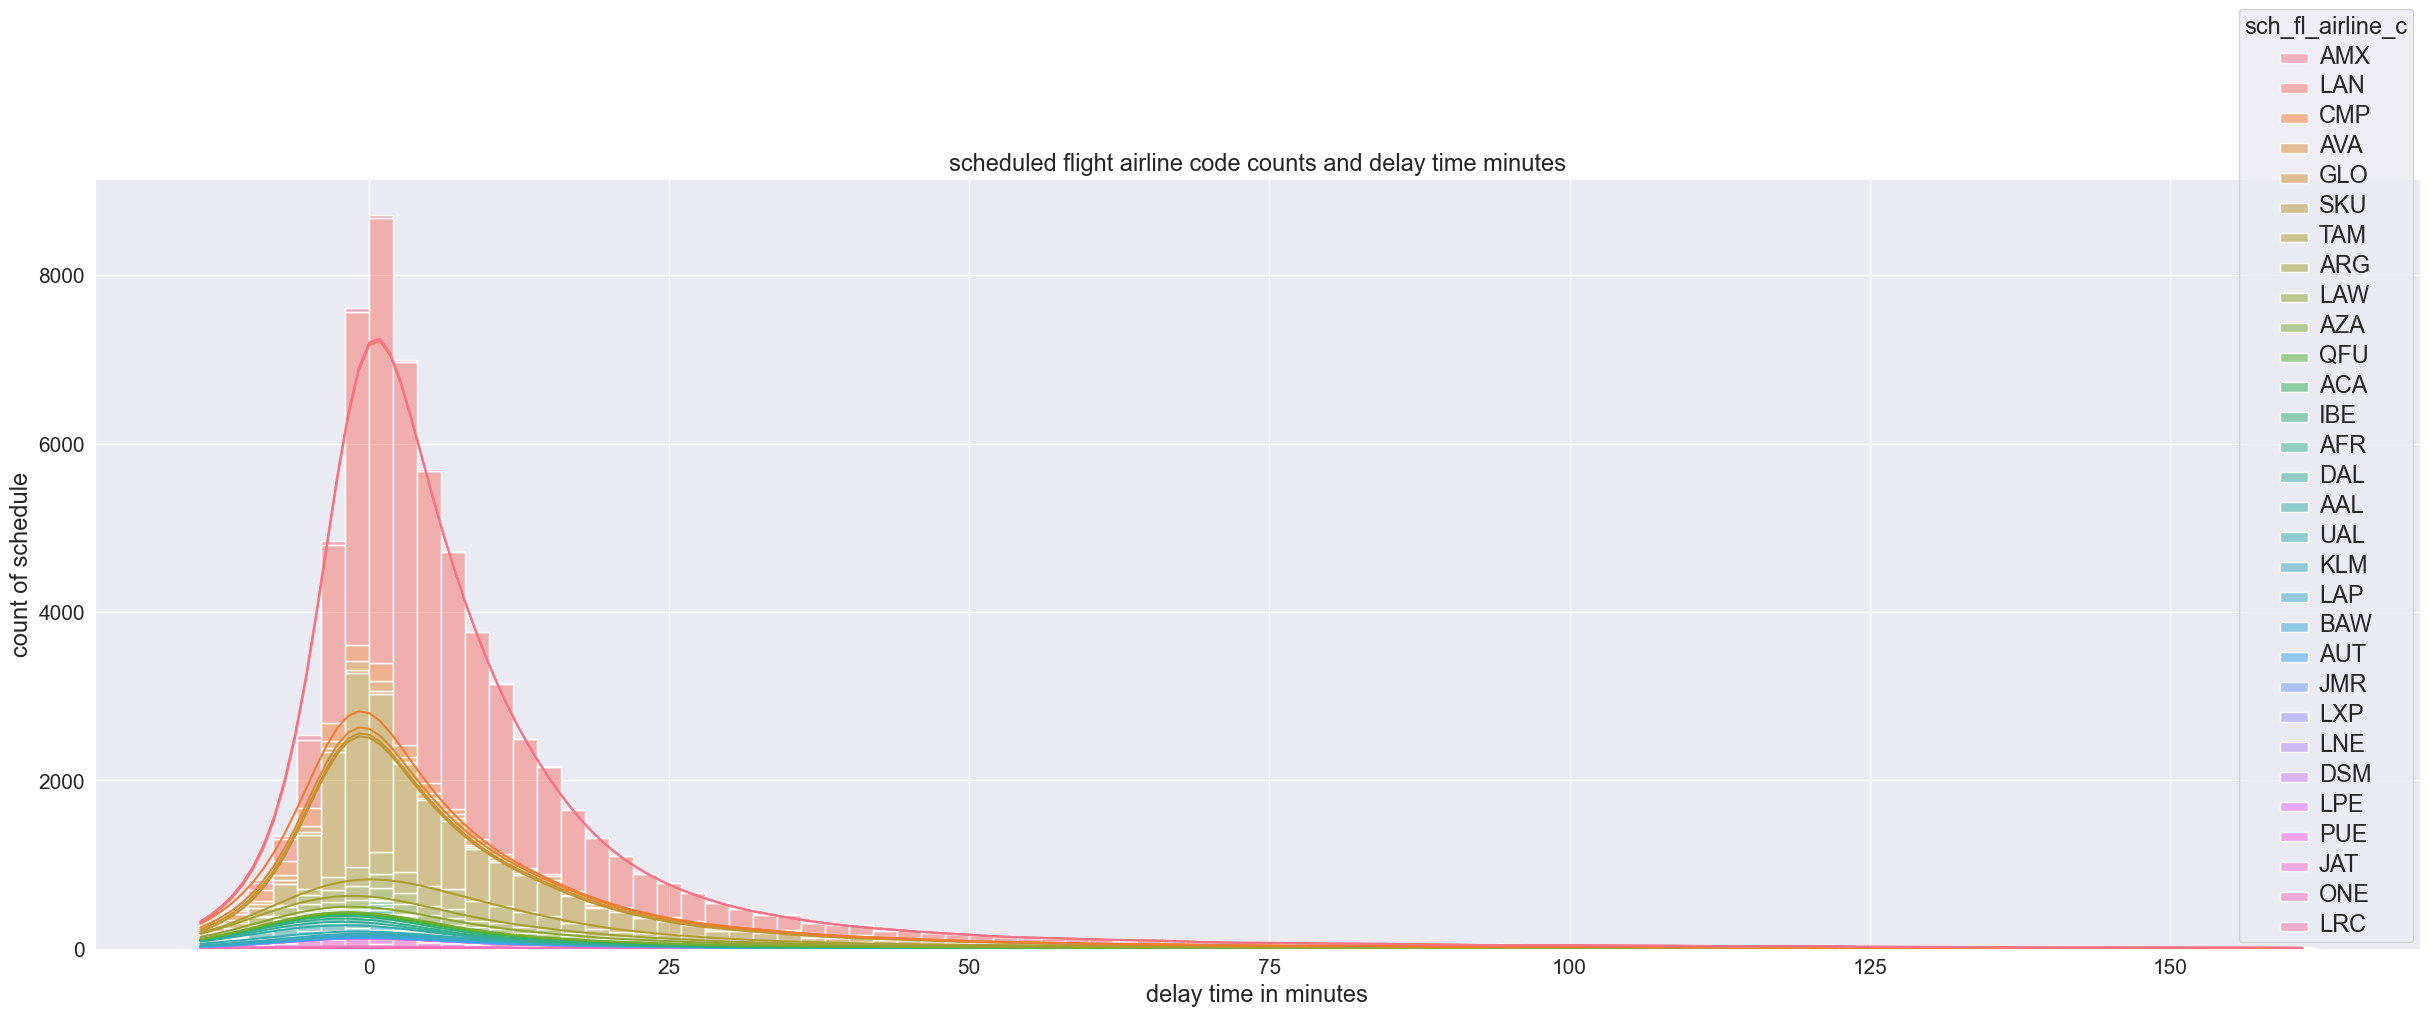

In [19]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='sch_fl_airline_c', multiple='stack', binwidth=2, kde=True)
plt.title('scheduled flight airline code counts and delay time minutes', fontsize=17)
plt.xlabel('delay time in minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of schedule', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

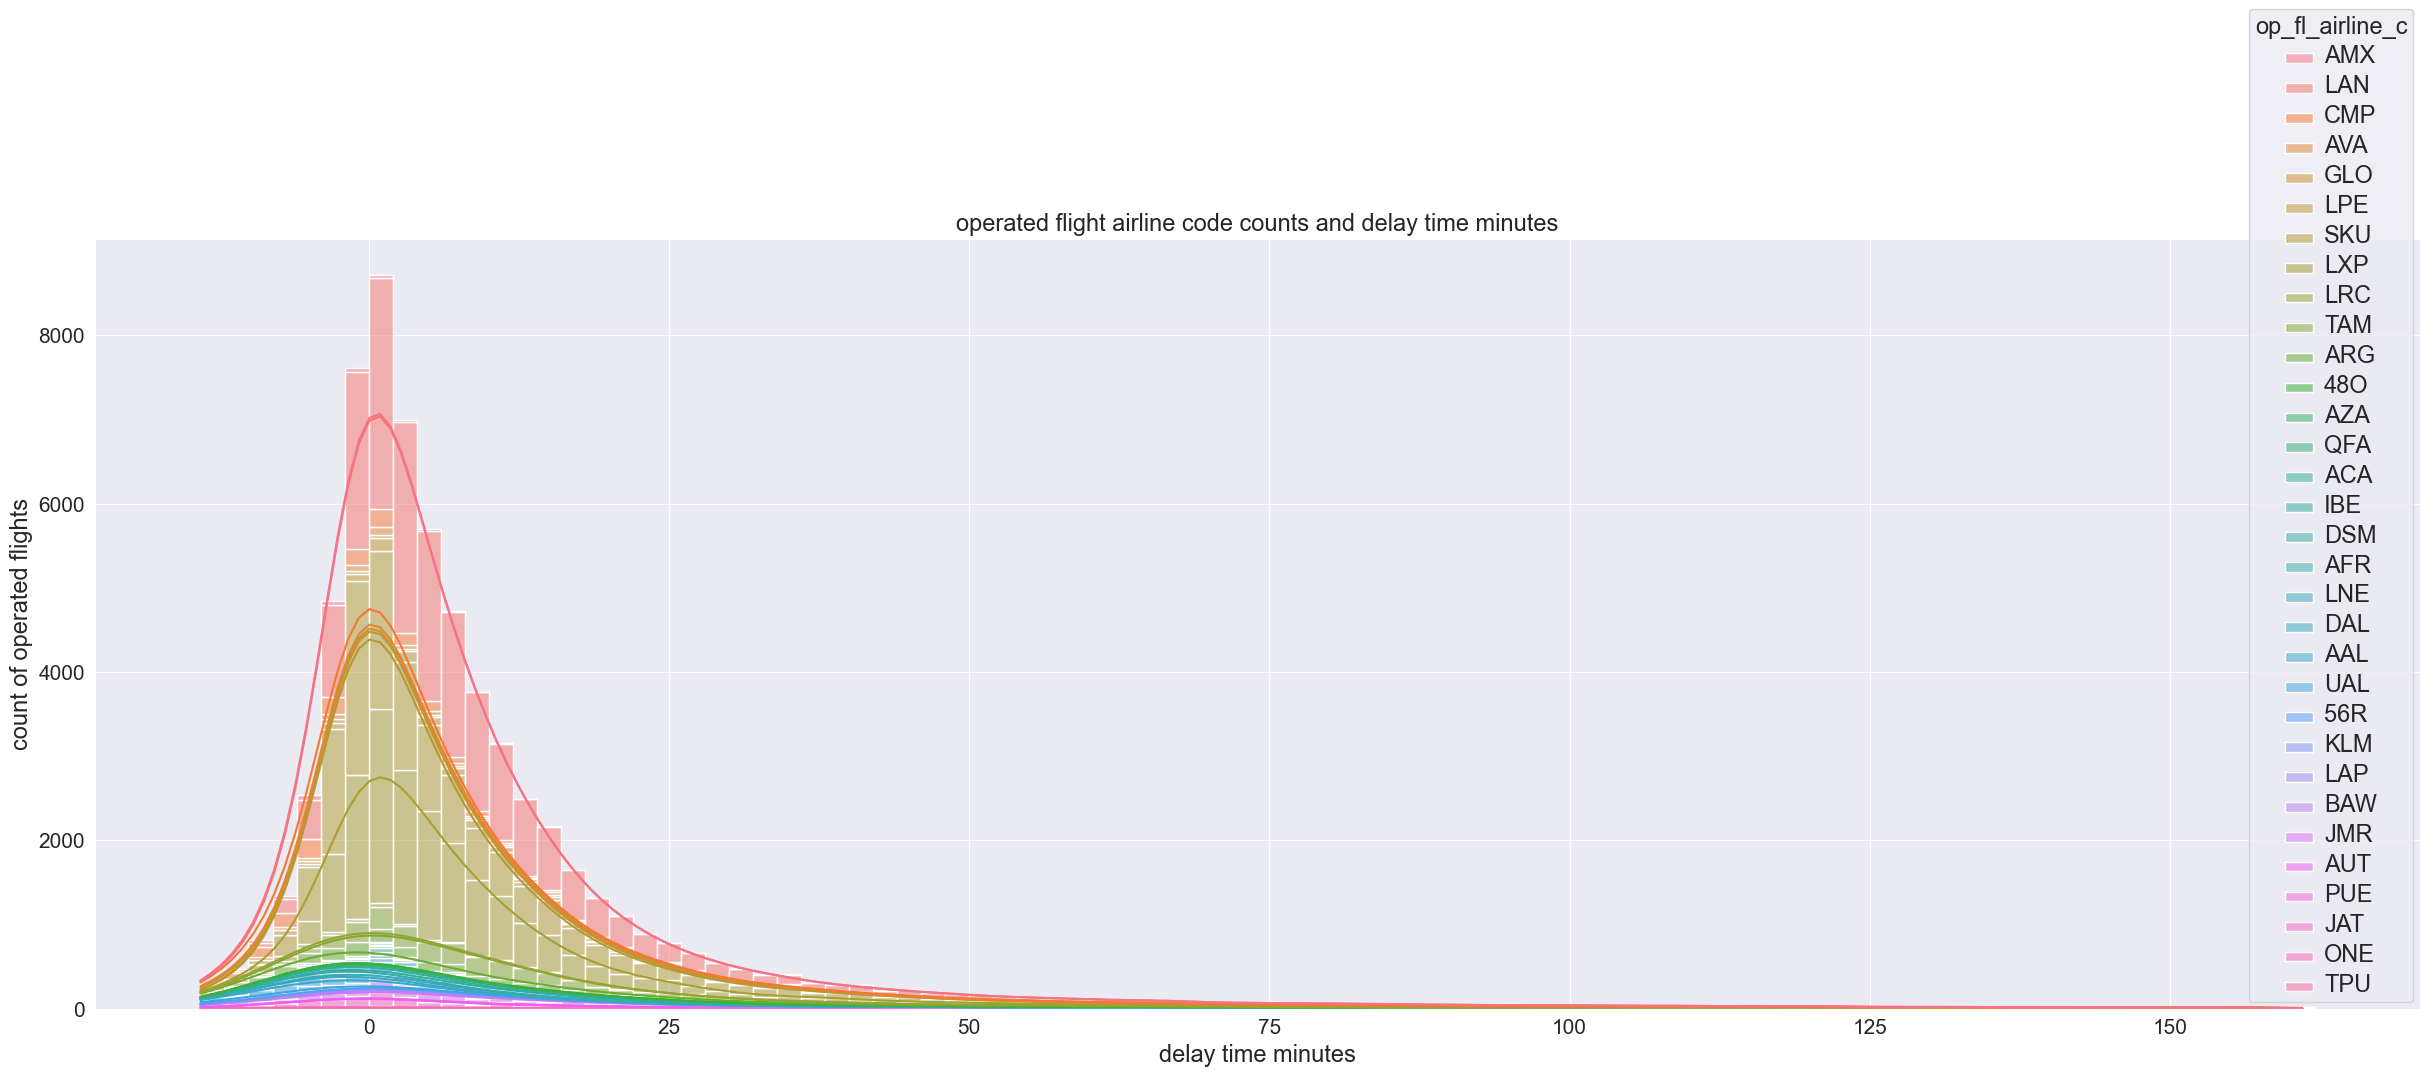

In [20]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='op_fl_airline_c', multiple='stack', binwidth=2, kde=True)
plt.title('operated flight airline code counts and delay time minutes', fontsize=17)
plt.xlabel('delay time minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of operated flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

The above two figures showed considerable change of plans for operated airlines like Aeromexico, It delivered almost half of its flights to be operated by other airlines below itself.

Interesting, the below figure clearly shows more international flights had stacked above the national flights, but for many of them their delay time were almost the same.

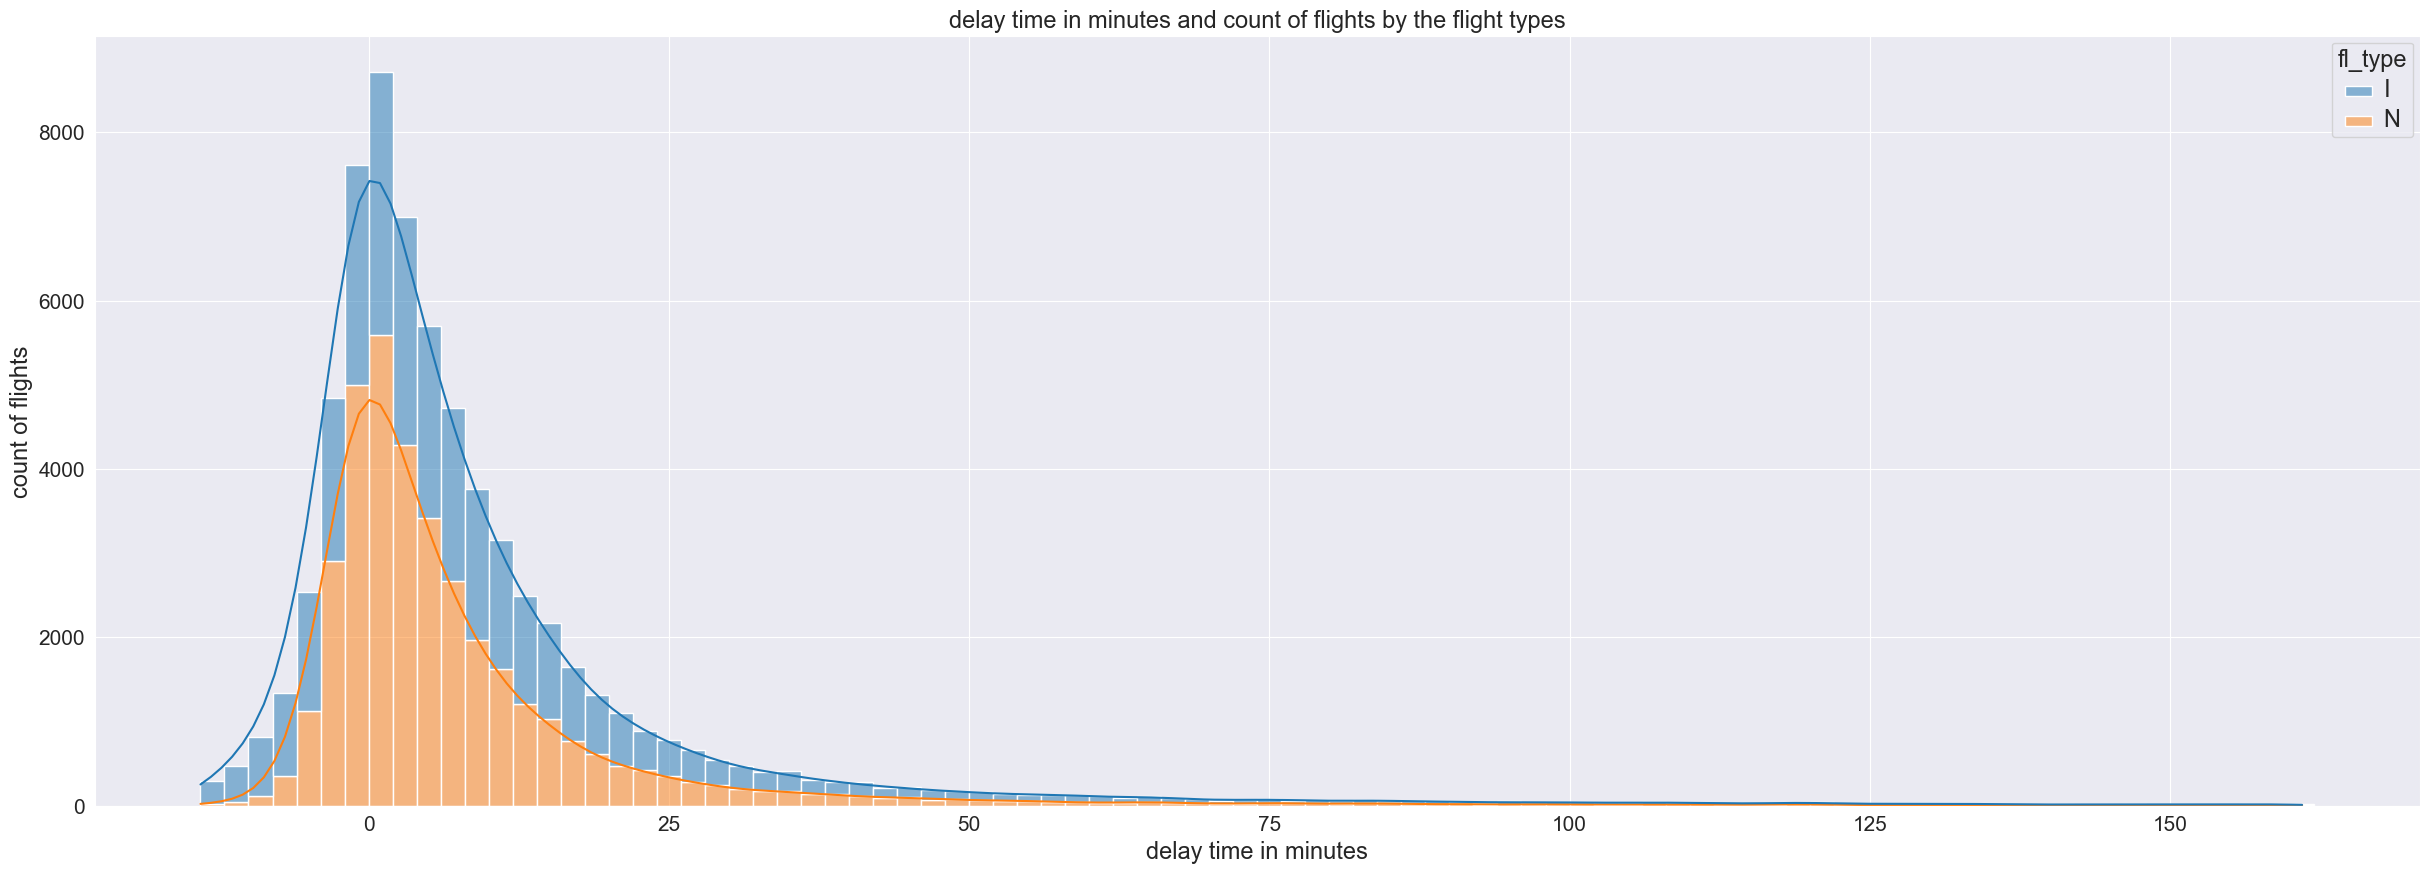

In [21]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='fl_type', multiple='stack', binwidth=2, kde=True)
plt.title('delay time in minutes and count of flights by the flight types', fontsize=17)
plt.xlabel('delay time in minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

Another interesting figure, it shows 2nd half of the year has considerably less flights than the first half of the year.

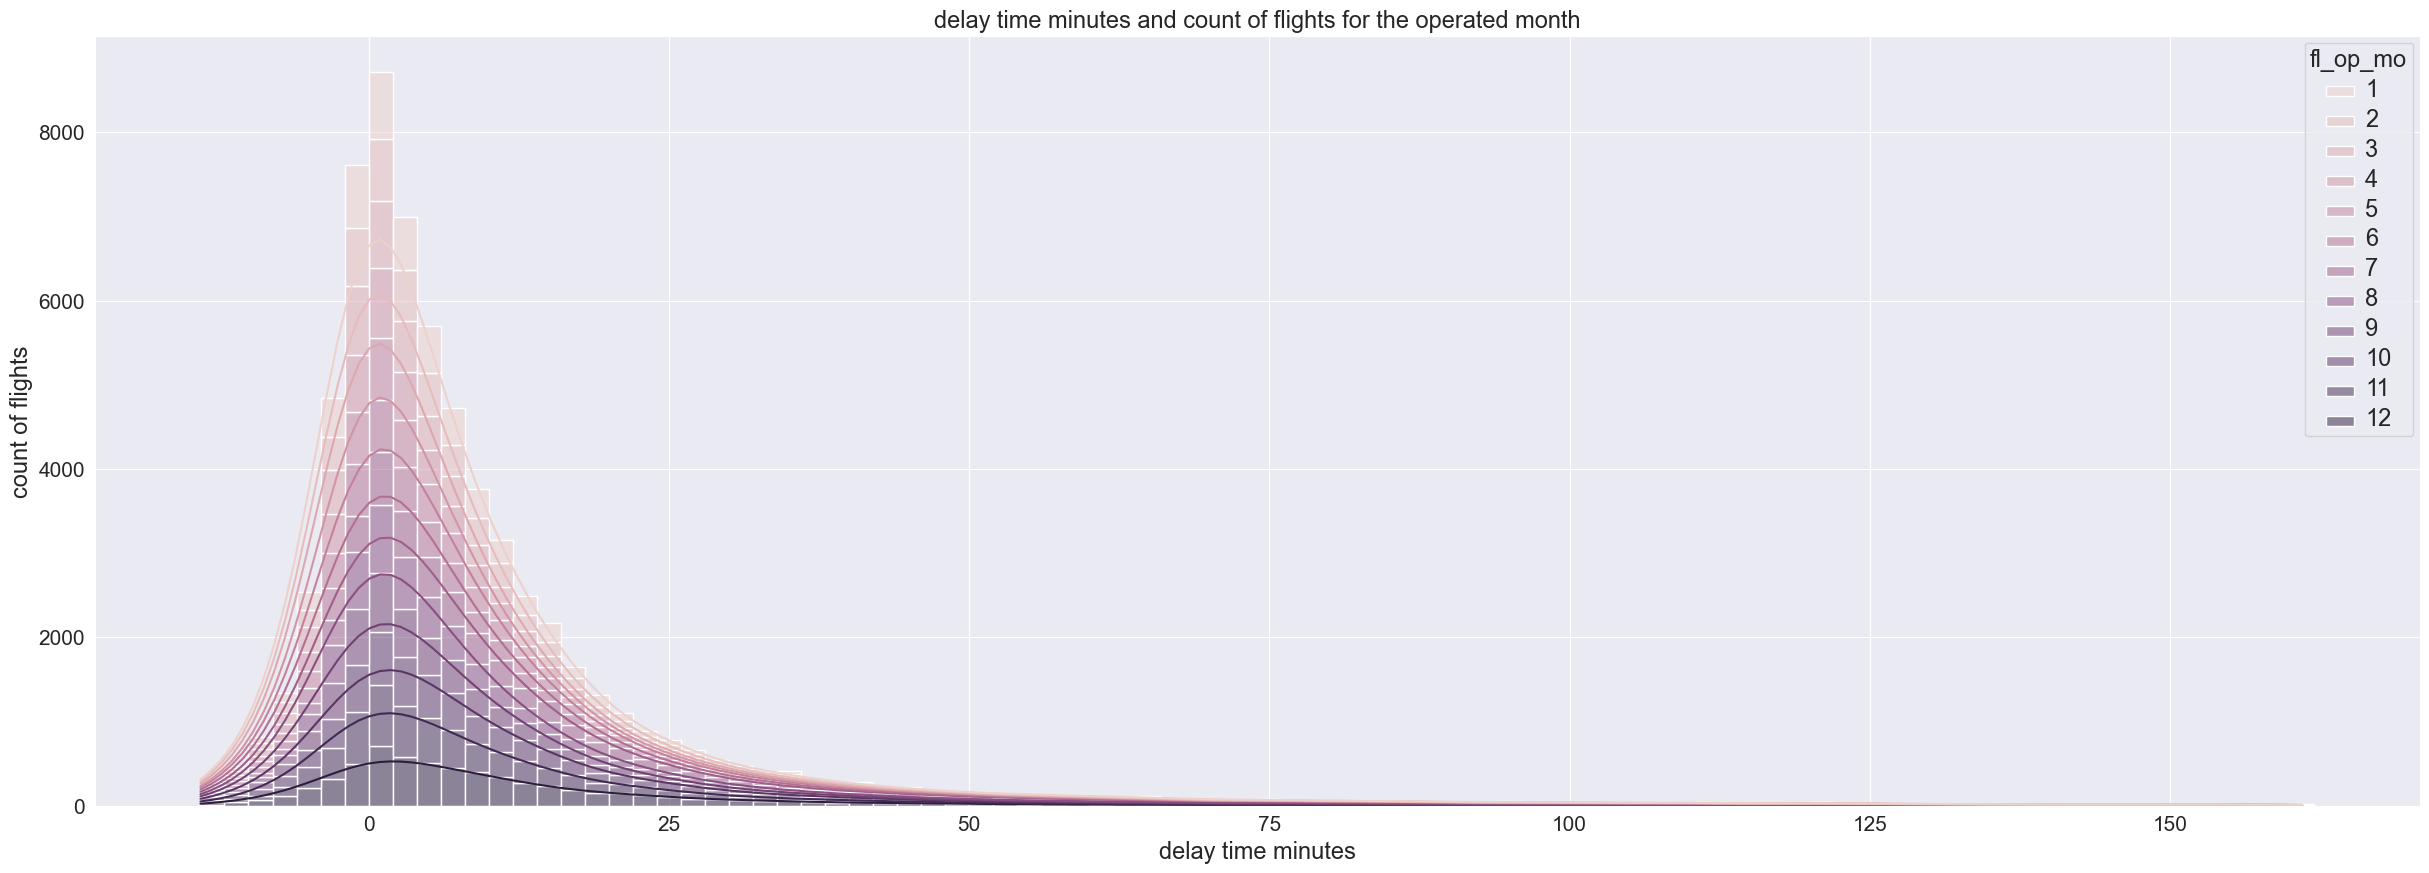

In [22]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='fl_op_mo', multiple='stack', binwidth=2, kde=True)
plt.title('delay time minutes and count of flights for the operated month', fontsize=17)
plt.xlabel('delay time minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

Another interesting figure below, shows on Sundays the airport is a lot more busy than on Saturdays

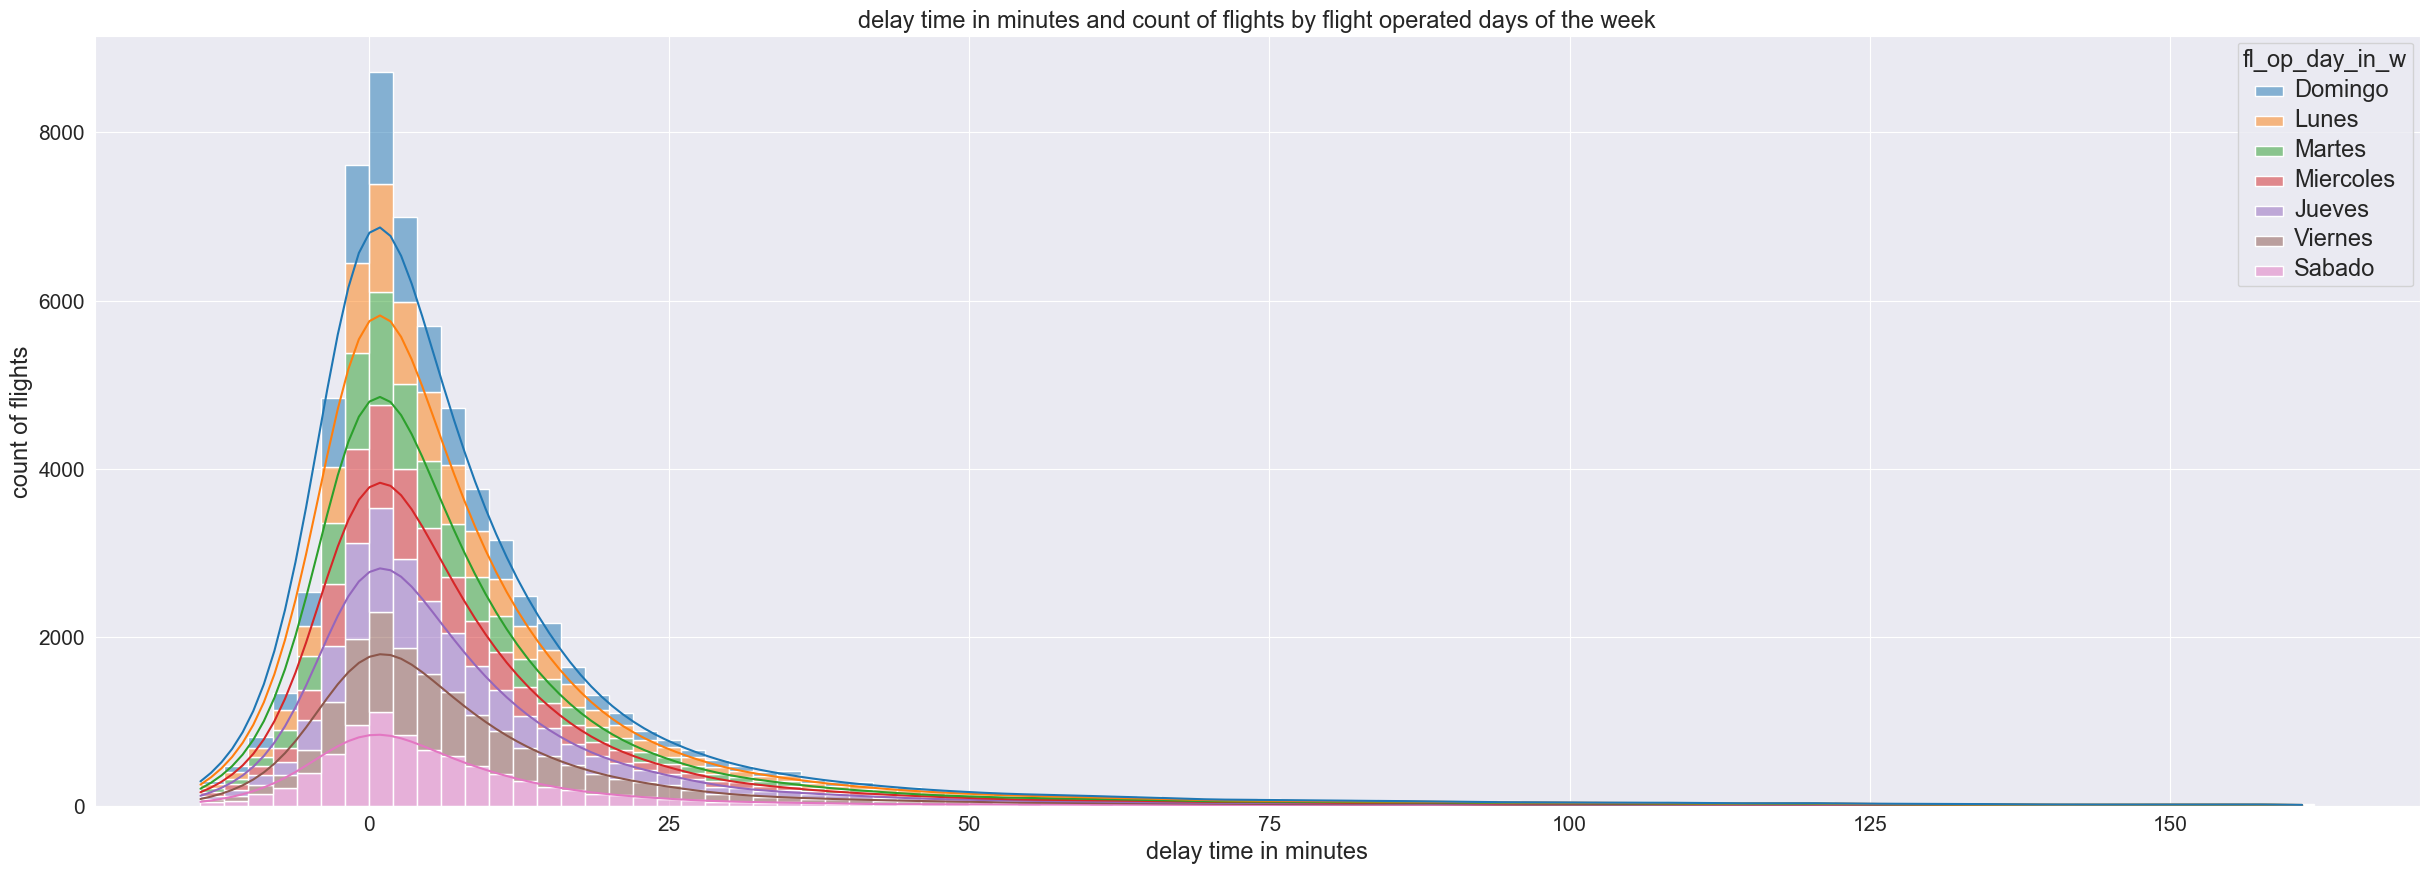

In [23]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='fl_op_day_in_w', multiple='stack', binwidth=2, kde=True)
plt.title('delay time in minutes and count of flights by flight operated days of the week', fontsize=17)
plt.xlabel('delay time in minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

Again another interesting figure shows in the first weeks of the months the airport is a lot more busy than the last weeks

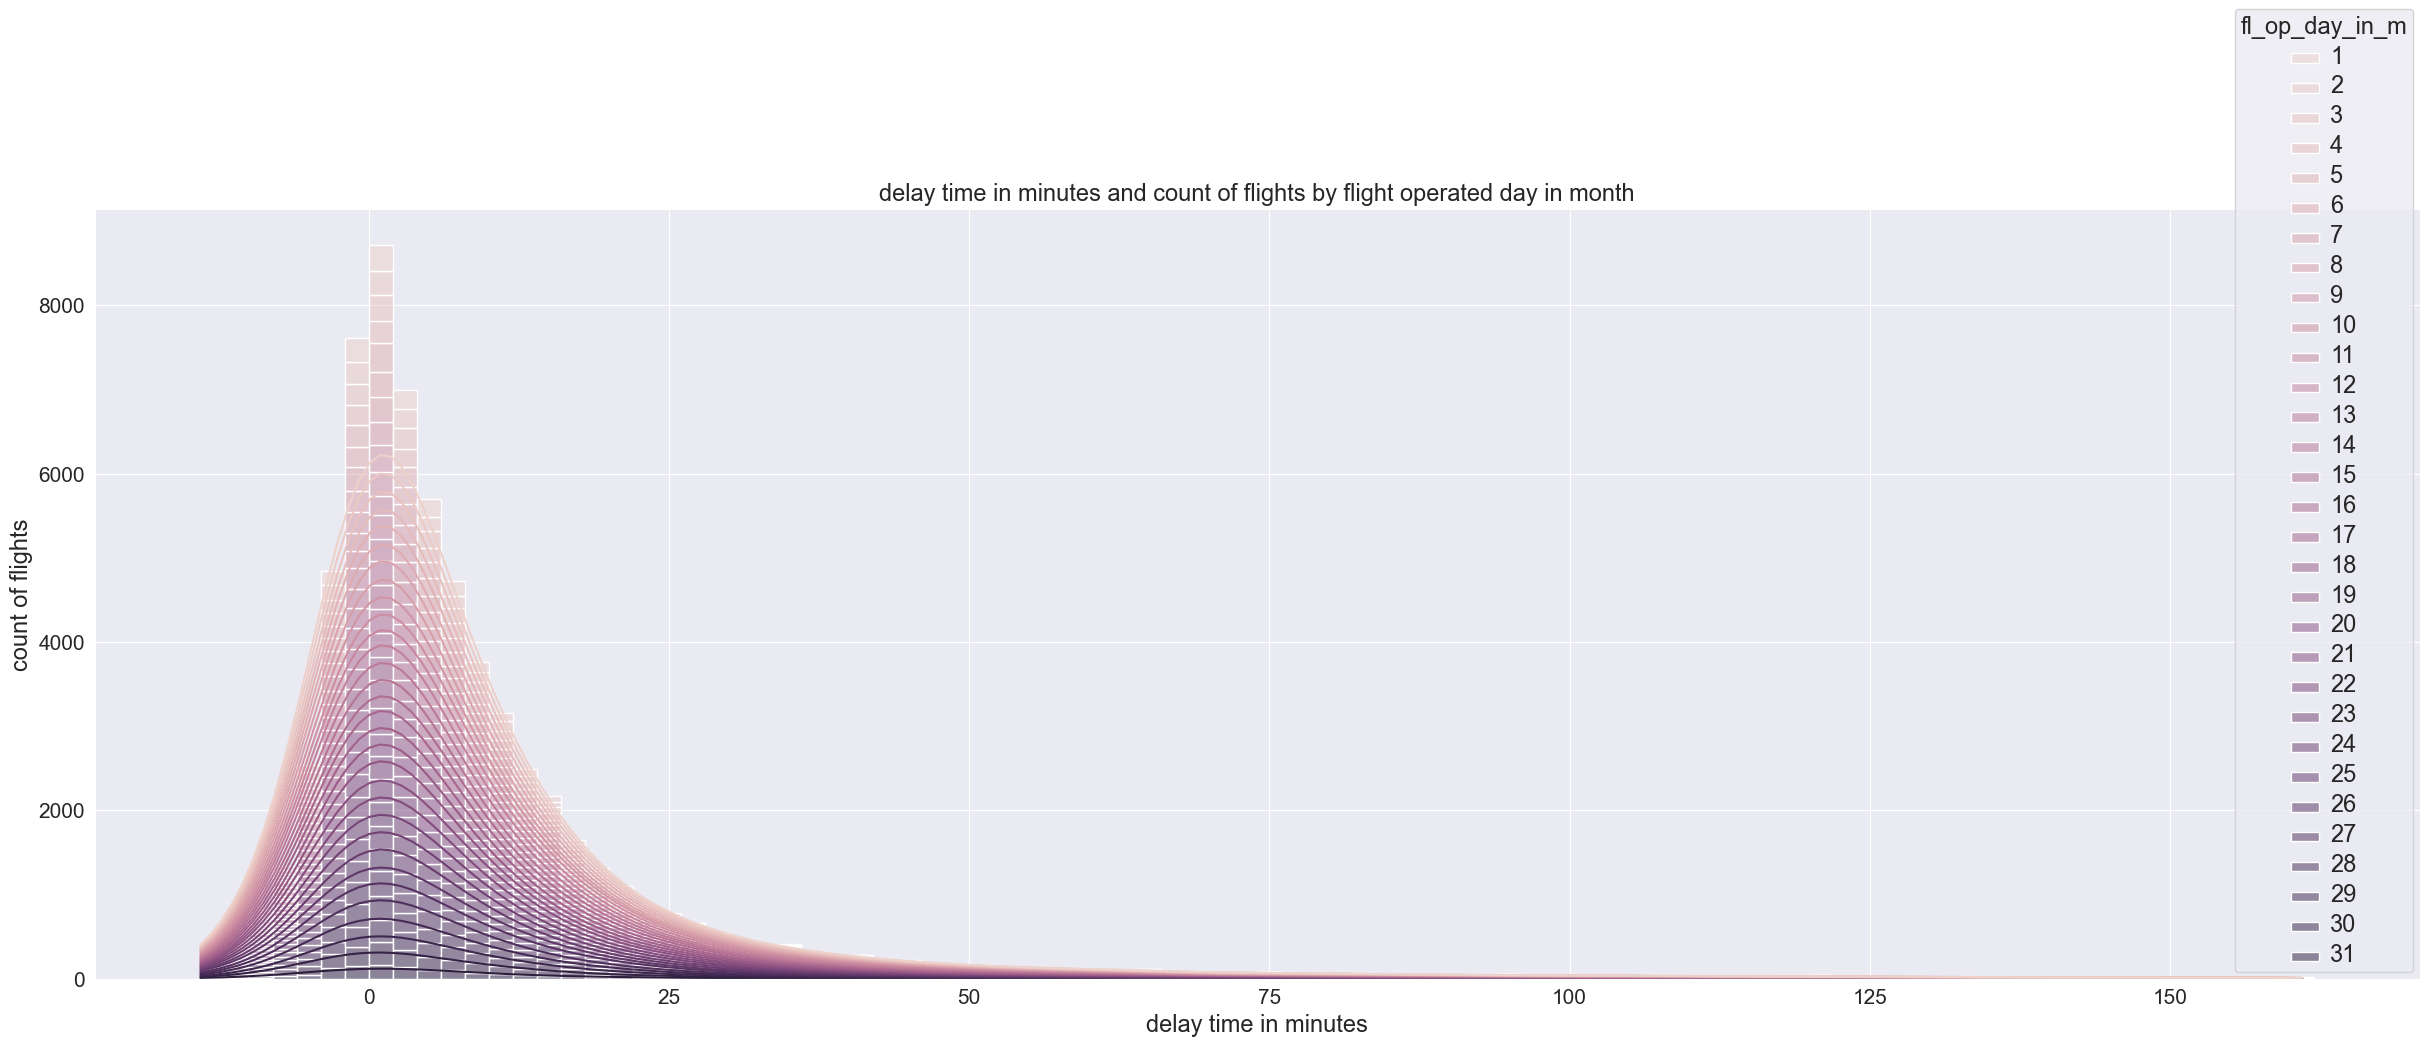

In [24]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='fl_op_day_in_m', multiple='stack', binwidth=2, kde=True)
plt.title('delay time in minutes and count of flights by flight operated day in month', fontsize=17)
plt.xlabel('delay time in minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

In this figure we see most of the flights were to the destination of Mexico, Bogota, Panama then comes Rio and Lima.

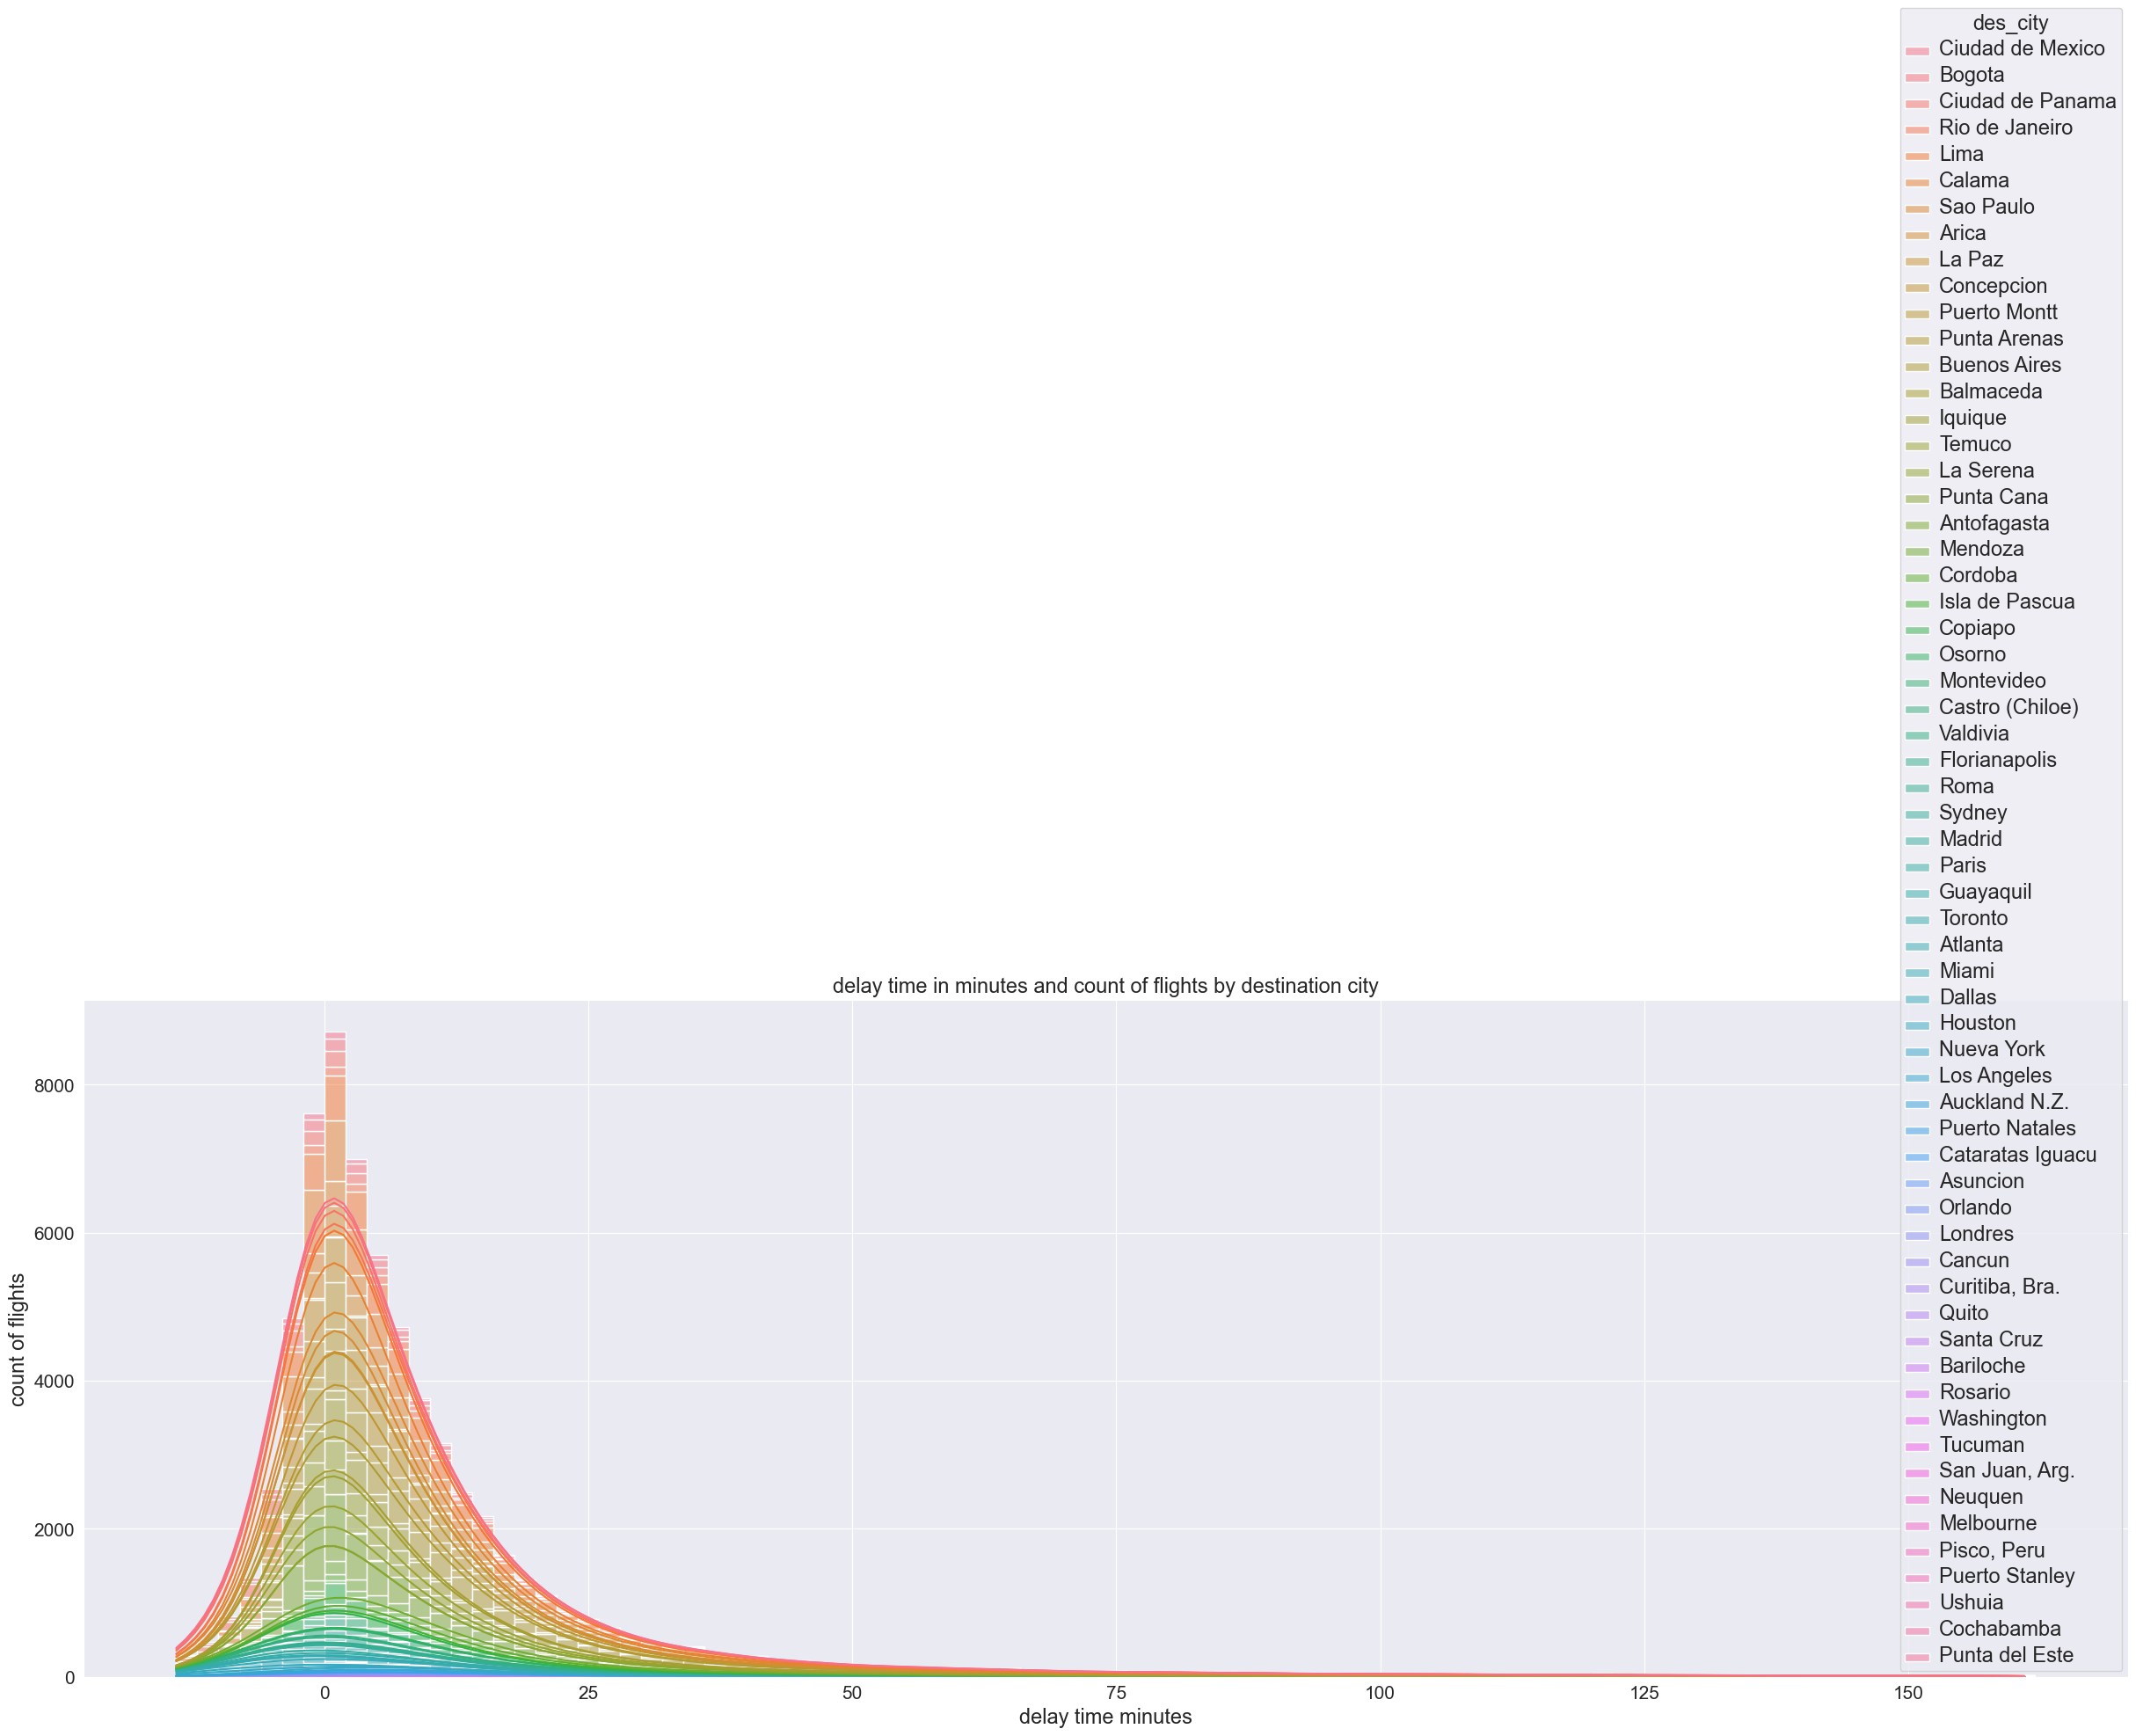

In [25]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df, x='delay_time_m', hue='des_city', multiple='stack', binwidth=2, kde=True)
plt.title('delay time in minutes and count of flights by destination city', fontsize=17)
plt.xlabel('delay time minutes', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('count of flights', fontsize=17)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize=17)
plt.setp(ax.get_legend().get_texts(), fontsize=17)
plt.show()

## Descriptive statistics, noteworthy insights to share

We can use describe() method to see descriptive statistics

In [26]:
perc=[.1, .5, .9]
df_describe = df.describe(percentiles=perc)
df_describe

fl_op_day_in_m      fl_op_mo      fl_op_yr        is_hub  delay_time_m
count    68205.000000  68205.000000  68205.000000  68205.000000  68205.000000
mean        15.714742      6.622667   2017.000029      0.585602      9.110945
std          8.782941      3.523281      0.005415      0.492621     19.313514
min          1.000000      1.000000   2017.000000      0.000000    -14.000000
10%          4.000000      2.000000   2017.000000      0.000000     -4.000000
50%         16.000000      7.000000   2017.000000      1.000000      4.000000
90%         28.000000     11.000000   2017.000000      1.000000     26.000000
max         31.000000     12.000000   2018.000000      1.000000    161.000000

As we can see most of (90%) of the flights were done till 28th of each month, and most were on 11th month of 2017 with delay time of at least 26 minutes, we also had some flights departed at earlier time than scheduled, on average there were 9 minutes delay time; standard deviation assumes normal distribution though we can see delay time of 19 minutes matches with most of the flights, they had departed 10 minutes early up to 28 minutes of delay as depicted in the previous histograms. Only few of them had departed earlier than 10 minutes and just a few had long delay time of about 2 to 2.5 hours. Generally looking, Santiago airport in 2017 and 2018 was managed considerably great according to the plan of not having long delays.

for more information we can visualize the descriptive analysis below

### Plotting describe() function for numerical values

In [27]:
num_col = df._get_numeric_data().columns #numerical columns
cat_col = list(set(df.columns)-set(num_col)) # categorical columns

In [28]:
df_num_describe = df.describe(percentiles=perc, include=['int64', 'float64'])  # just to consider those columns with numeric values
df_num_describe.reset_index(inplace=True)

In [29]:
df_num_describe = df_num_describe[df_num_describe['index'] != 'count']

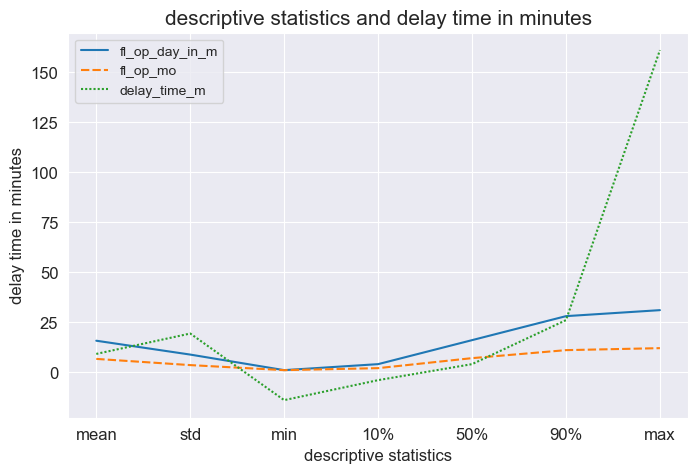

In [30]:
plt.figure(figsize=(8,5))
df_describe_temp = df_num_describe.drop(columns=['fl_op_yr'])
ax = sns.lineplot(data=df_describe_temp)
plt.title('descriptive statistics and delay time in minutes', fontsize=15)
plt.xlabel('descriptive statistics', fontsize=12)
ax.set_xticks(range(1, 8))
ax.set_xticklabels(df_describe_temp['index'].values, fontsize=12)
plt.ylabel('delay time in minutes', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Another figure which confirms our previous findings regarding the statistical quality of the flights that almost 90% of them have delay of just 25 minutes and only a few of them have long delay time, also, it clearly shows considerable number of flights have departed early.

### Plotting value_counts() for categorical variables

# 2. Generating columns by considering if thresholds has been passed for four sections
- high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
       - Timeslot Dec-15 and Mar-3 is wrong we don't have any flight information after Jan 2018, so it's not feasible to have Dec-15 and Mar-3, if the format was the way around like Mar-3 and Dec-15 it would cover the other two timeslots. So, I choose Feb-15 and Mar-3.
- min_diff : difference in minutes between Date-O and Date-I
- delay_15 : 1 if min_diff > 15, 0 if not.
- period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based
on Date-I .

In [31]:
df['sch_fl_time'].dt.year.value_counts()

2017    68205
Name: sch_fl_time, dtype: int64

In [32]:
df['op_fl_time'].dt.year.value_counts()

2017    68203
2018        2
Name: op_fl_time, dtype: int64

In [33]:
# Date-I is the sch_fl_time
date_lower1 = date(2017, 2, 15)
date_upper1 = date(2017, 3, 3)
date_lower2 = date(2017, 7, 15)
date_upper2 = date(2017, 7, 31)
date_lower3 = date(2017, 9, 11)
date_upper3 = date(2017, 9, 30)
df['high_season'] = np.zeros(len(df)).astype(int)
df.loc[(df['sch_fl_time'].dt.date >= date_lower1) & (df['sch_fl_time'].dt.date <= date_upper1), 'high_season'] = 1
df.loc[(df['sch_fl_time'].dt.date >= date_lower2) & (df['sch_fl_time'].dt.date <= date_upper2), 'high_season'] = 1
df.loc[(df['sch_fl_time'].dt.date >= date_lower3) & (df['sch_fl_time'].dt.date <= date_upper3), 'high_season'] = 1

In [34]:
df['min_diff'] = df['delay_time_m']
df['delay_15'] = np.zeros(len(df)).astype(int)
df.loc[df['min_diff'] > 15, 'delay_15'] = 1

In [35]:
df['period_day'] = np.zeros(len(df)).astype(int)
df.loc[(df['sch_fl_time'].dt.time >= time(5, 0, 0)) & (df['sch_fl_time'].dt.time <= time(11, 59, 0)), 'period_day'] = 'morning'
df.loc[(df['sch_fl_time'].dt.time >= time(12, 0, 0)) & (df['sch_fl_time'].dt.time <= time(18, 59, 0)), 'period_day'] = 'afternoon'
df.loc[(df['sch_fl_time'].dt.time >= time(19, 0, 0)) & (df['sch_fl_time'].dt.time <= time(23, 59, 0)), 'period_day'] = 'night'
df.loc[(df['sch_fl_time'].dt.time >= time(0, 0, 0)) & (df['sch_fl_time'].dt.time <= time(4, 59, 0)), 'period_day'] = 'night'

In [36]:
df['period_day'].value_counts()

afternoon    25506
morning      25351
night        17348
Name: period_day, dtype: int64

In [37]:
df.to_csv('synthetic_features.csv', columns=['high_season', 'min_diff', 'delay_15', 'period_day'])

# 3. What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight?What variables would you expect to have the most influence in predicting delays?

According to the following plot 14th and 22nd of May, 16th of June, 11th of March and 5th of February were the only days with the highest delay time. Interestingly, in the first half of the year the airport was busier than other times of the year, and accordingly all the delay times happened specifically in the 2nd, 3rd, 5th, and 6th month of the year. What did happen in that time? Maybe more people went on vacation because of the end of schools winter semester and summer time!!

<Figure size 4000x1000 with 0 Axes>

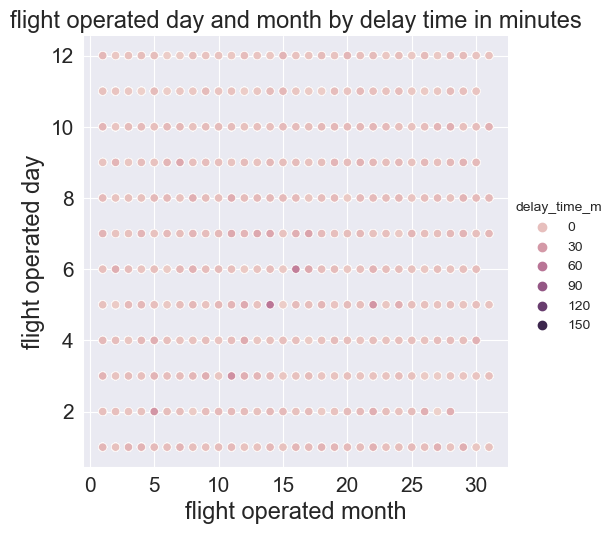

In [38]:
plt.figure(figsize=(40,10))
sns.relplot(df, x='fl_op_day_in_m', y='fl_op_mo', hue='delay_time_m')
plt.title('flight operated day and month by delay time in minutes', fontsize=17)
plt.xlabel('flight operated month', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('flight operated day', fontsize=17)
plt.yticks(fontsize=15)
plt.show()

Similar figure below confirms those 5 days with delay times.

<Figure size 4000x1000 with 0 Axes>

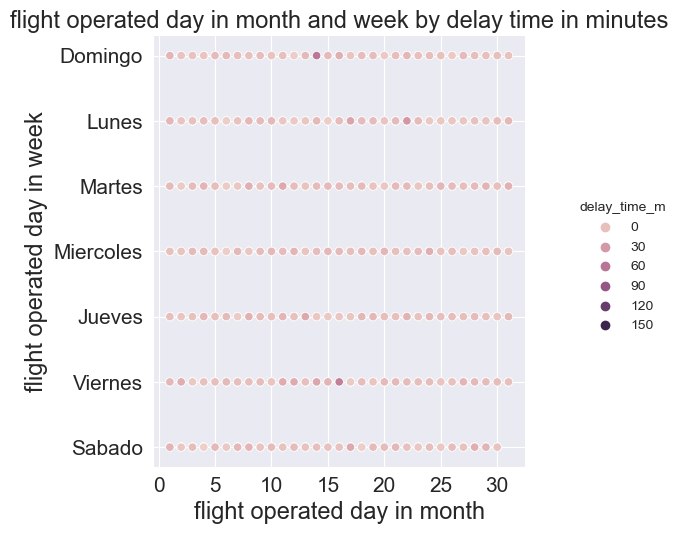

In [39]:
plt.figure(figsize=(40,10))
sns.relplot(df, x='fl_op_day_in_m', y='fl_op_day_in_w', hue='delay_time_m')
plt.title('flight operated day in month and week by delay time in minutes', fontsize=17)
plt.xlabel('flight operated day in month', fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('flight operated day in week', fontsize=17)
plt.yticks(fontsize=15)
plt.show()

If I plot the bubble chart focusing on those rows of the dataset with long delay time, separating national and international flights all with respect to the destinations that would be helpful to see flights to which destinations had long delay time.

15 minutes delay time provided 6041 results. Not applicable to be shown in a plot. I would choose 45 minutes

In [40]:
df_long_delayed_dom = df.loc[(abs(df['delay_time_m']) >= 45) & (df['fl_type'] == 'N')]

In [41]:
df_long_delayed_dom.shape # 1300! Good.

(1300, 24)

<Figure size 6000x2000 with 0 Axes>

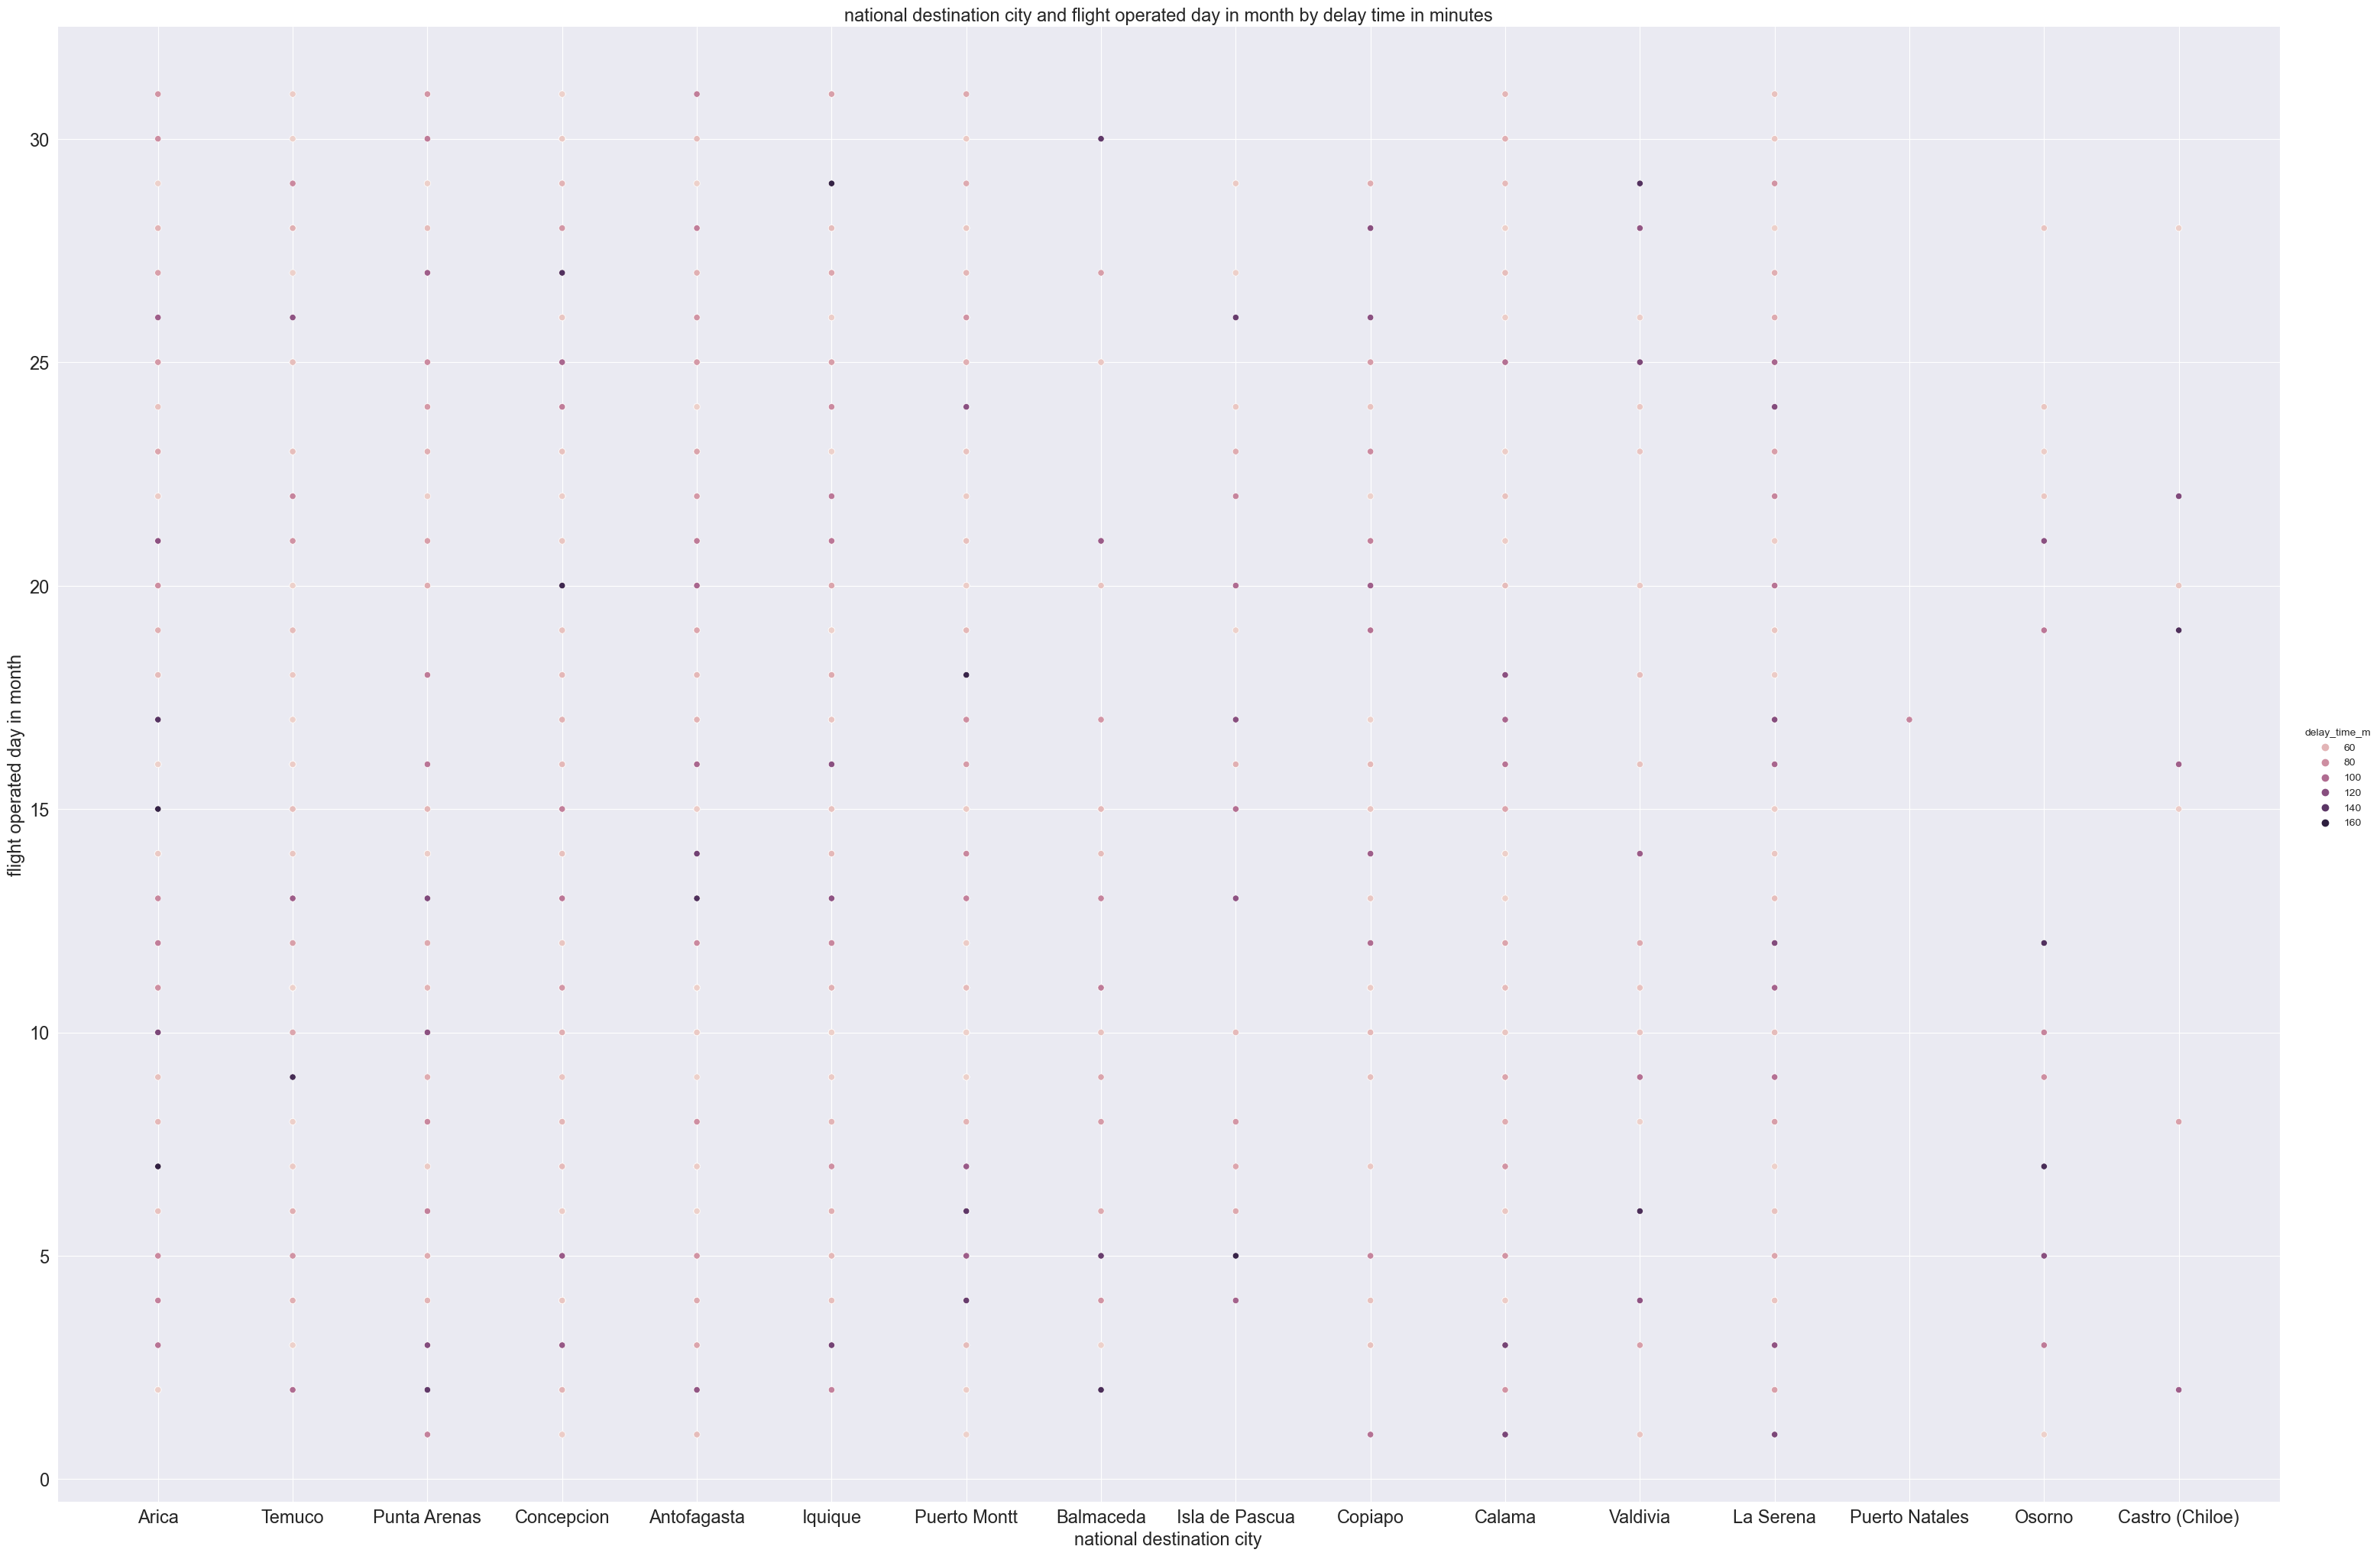

In [42]:
plt.figure(figsize=(60,20))
sns.relplot(df_long_delayed_dom, x='des_city', y='fl_op_day_in_m', hue='delay_time_m', height=20, aspect=30/20)
sns.set(font_scale=1.7)
plt.title('national destination city and flight operated day in month by delay time in minutes', fontsize=17)
plt.xlabel('national destination city', fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel('flight operated day in month', fontsize=17)
plt.yticks(fontsize=17)
plt.show()

The cities named in the above plot's x-axis were the only national flights which had delayed more than 45 minutes. We can see some destinations like Castro(Chiloe) and Puerto Natales had few flights from Santiago but most of them delayed. For the rest the condition was half-and-half, definitely there is something happening, lets see some of the flights in which days and times they were.

In [43]:
df_long_delayed_dom.loc[(df_long_delayed_dom['des_city'] == 'Castro (Chiloe)') | (df_long_delayed_dom['des_city'] == 'Puerto Natales')].groupby(['fl_op_day_in_w']).value_counts()

fl_op_day_in_w  sch_fl_time          sch_fl_no  pr_ori_city_c  pr_des_city_c  sch_fl_airline_c  op_fl_time           op_fl_no  op_ori_city_c  op_des_city_c  op_fl_airline_c  fl_op_day_in_m  fl_op_mo  fl_op_yr  fl_type  op_airline   ori_city  des_city         is_hub  delay_time_m  high_season  min_diff  delay_15  period_day
Domingo         2017-04-02 10:35:00  69         SCEL           SCPQ           LAN               2017-04-02 12:24:00  69        SCEL           SCPQ           LAN              2               4         2017      N        Grupo LATAM  Santiago  Castro (Chiloe)  0       109.0         0            109.0     1         morning       1
                2017-07-16 11:12:00  69         SCEL           SCPQ           LAN               2017-07-16 13:00:00  69        SCEL           SCPQ           LAN              16              7         2017      N        Grupo LATAM  Santiago  Castro (Chiloe)  0       108.0         1            108.0     1         morning       1
Martes         

We can consider being a hub airport as a factor for having long delayed flights too.

The point is airports of both cities of Castro(Chiloe) and Puerto Natales are not a hub, also period of the day, being high season or not didn't make them any differences but as mentioned before almost all of them happened in the last half of the month and more specifically in the last week, considering repetition in summer time and end of winter semester, so most probably the delay time is not related to those airports performances, but all had the same flight number LAN69 flew in Sundays, Tuesdays, Saturdays, and Fridays.

Let's see what is happening with the international flights

45 minutes delay time was still low for international flights provide 1896 results. Considering 1.5 hour delay time.

In [44]:
df_long_delayed_int = df.loc[(abs(df['delay_time_m']) >= 90) & (df['fl_type'] == 'I')]

In [45]:
df_long_delayed_int.shape # 558!! Now, it's better.

(558, 24)

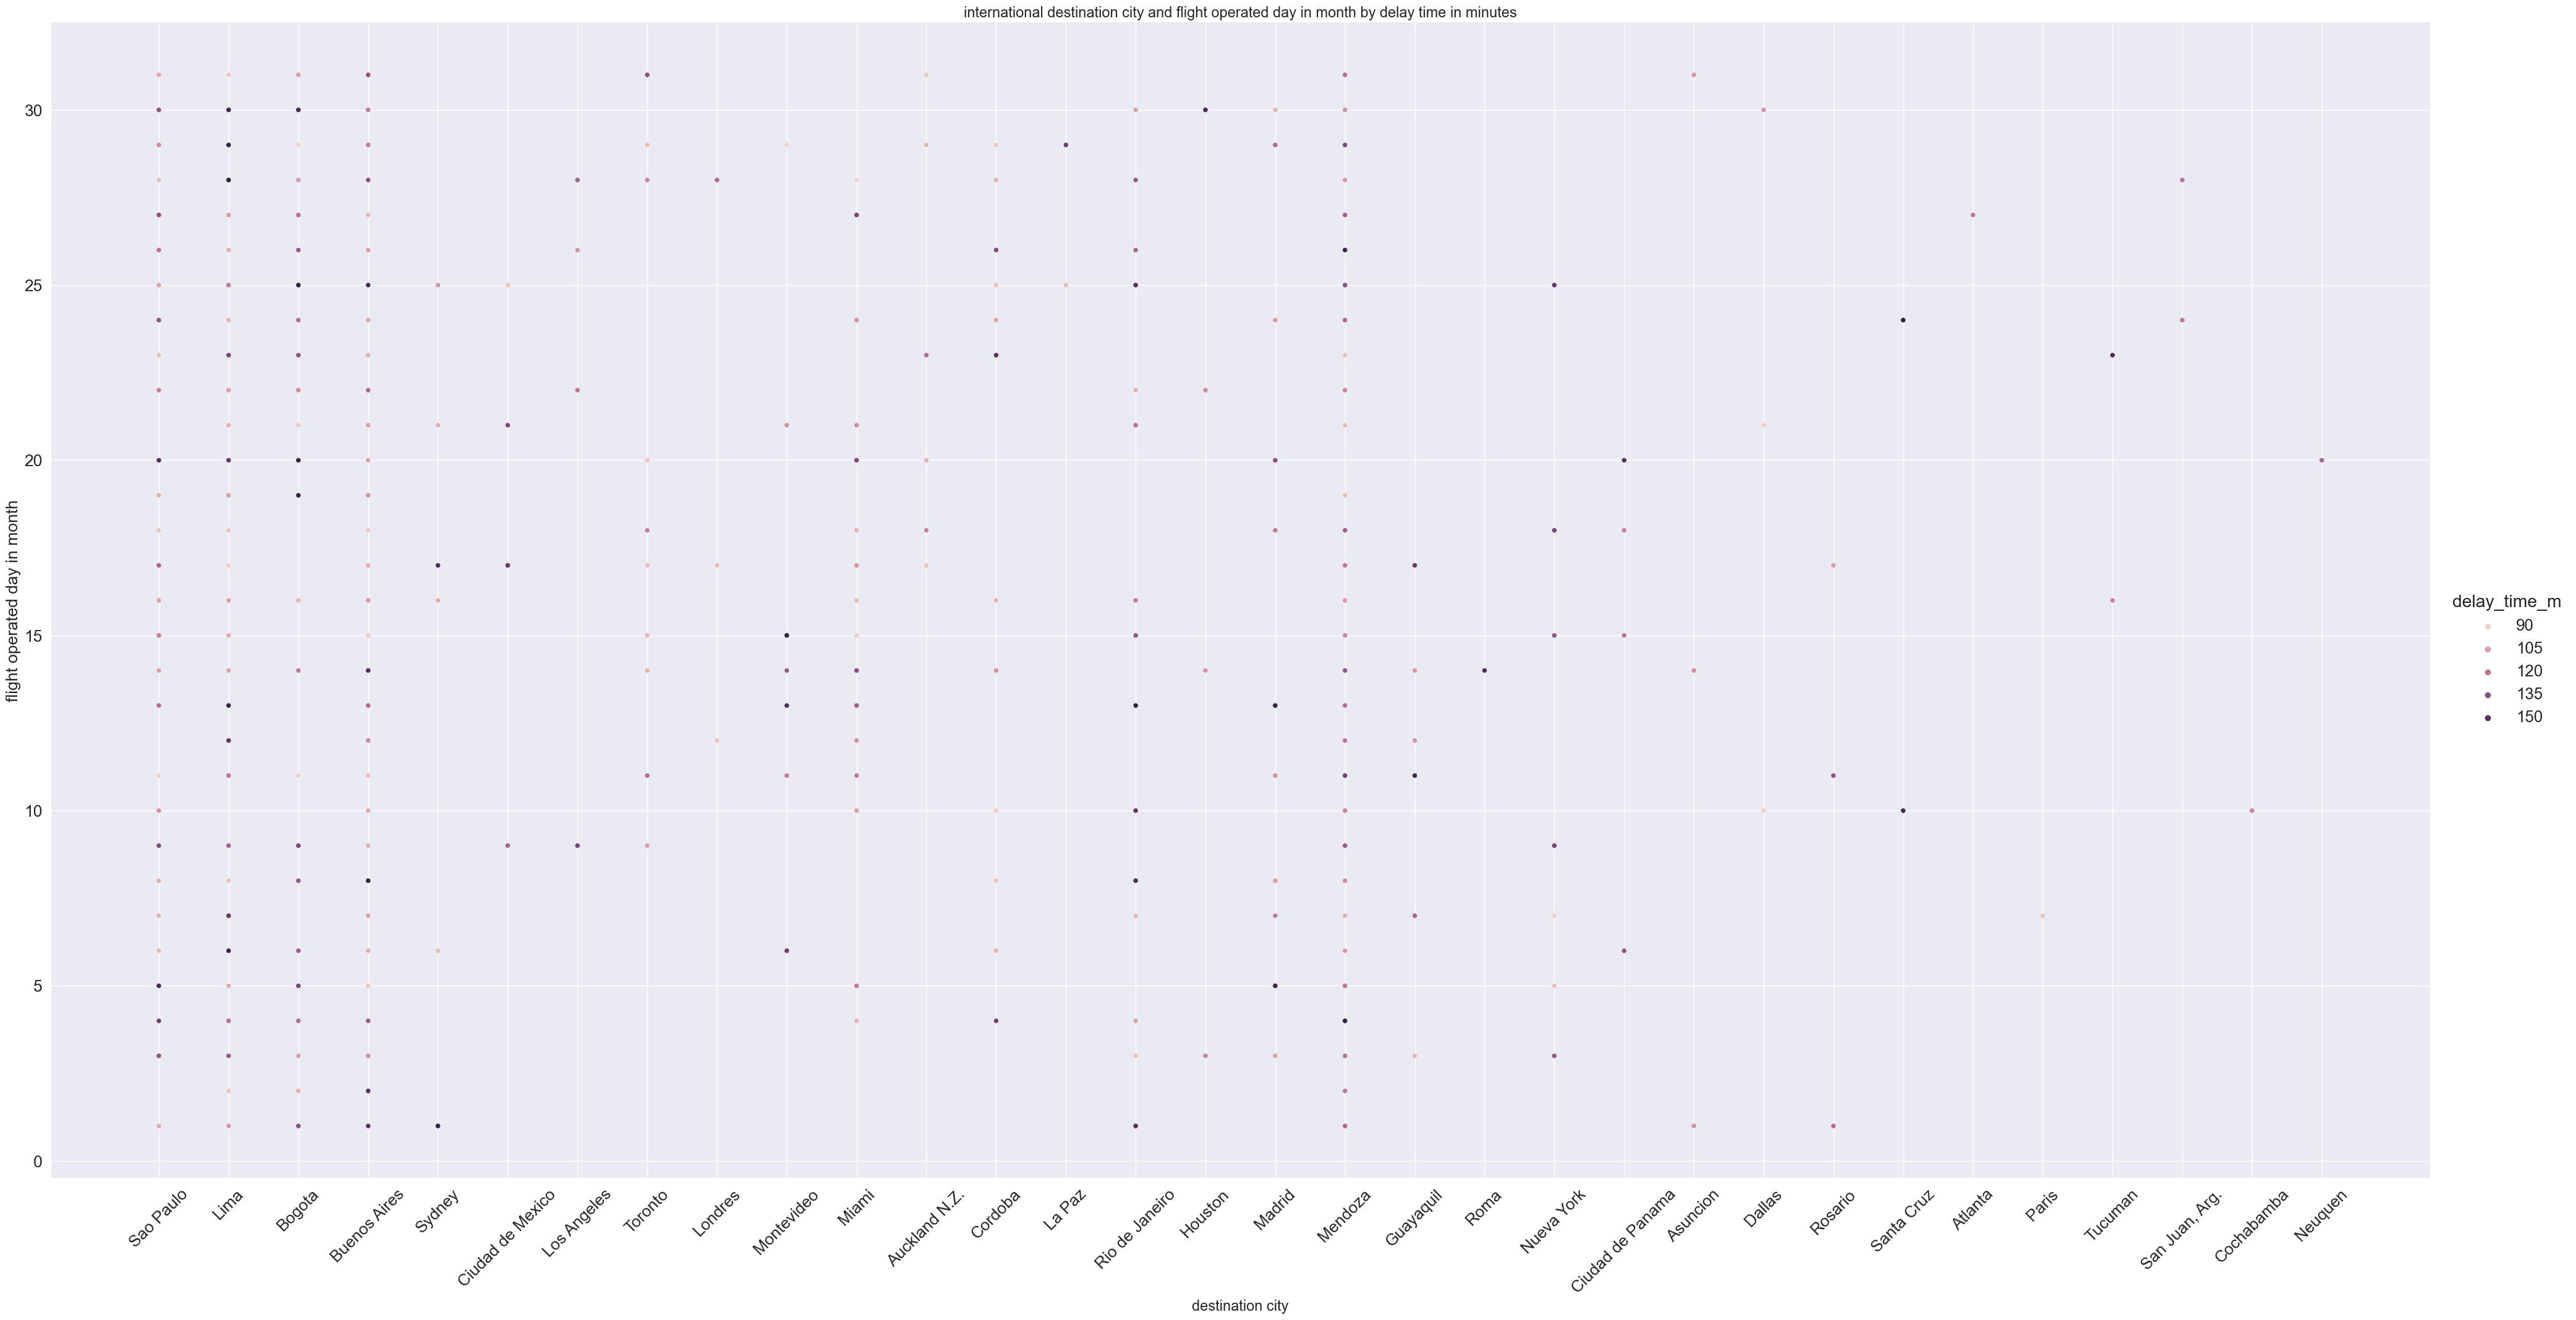

In [46]:
# plt.figure(figsize=(60,20))
sns.relplot(df_long_delayed_int, x='des_city', y='fl_op_day_in_m', hue='delay_time_m', height=20, aspect=40/20)
sns.set(font_scale=1.7)
plt.title('international destination city and flight operated day in month by delay time in minutes', fontsize=17)
plt.xlabel('destination city', fontsize=17)
plt.xticks(fontsize=19, rotation=45)
plt.ylabel('flight operated day in month', fontsize=19)
plt.yticks(fontsize=19)
plt.show()

Although I have increase the delay time to 90 minutes some cities still have many flights which many of them had been delayed, therefore these are the cities with the highest number of delays.
Some of the highest delayed ones are:
- Sao Paulo
- Lima
- Bogota
- Buenos Aires
- Miami
- Rio de Janeiro
- Mendoza

So we would focus on these to find reasons for their delays

In [47]:
df_long_delayed_int['des_city'].value_counts()

Lima                120
Buenos Aires         97
Sao Paulo            70
Mendoza              68
Bogota               42
Rio de Janeiro       24
Miami                23
Cordoba              13
Madrid               12
Toronto              12
Nueva York            8
Sydney                8
Montevideo            7
Auckland N.Z.         7
Guayaquil             6
Houston               4
Ciudad de Mexico      4
Ciudad de Panama      4
Los Angeles           4
Asuncion              3
Londres               3
Dallas                3
Rosario               3
Tucuman               2
San Juan, Arg.        2
La Paz                2
Santa Cruz            2
Atlanta               1
Paris                 1
Roma                  1
Cochabamba            1
Neuquen               1
Name: des_city, dtype: int64

In [48]:
int_flights = df_long_delayed_int.loc[(df_long_delayed_int['des_city'] == 'Sao Paulo') | (df_long_delayed_int['des_city'] == 'Lima') | (df_long_delayed_int['des_city'] == 'Bogota') | (df_long_delayed_int['des_city'] == 'Buenos Aires') | (df_long_delayed_int['des_city'] == 'Miami') | (df_long_delayed_int['des_city'] == 'Rio de Janeiro') | (df_long_delayed_int['des_city'] == 'Mendoza')].groupby(['fl_op_day_in_w']).value_counts(ascending=True)
int_flights

fl_op_day_in_w  sch_fl_time          sch_fl_no  pr_ori_city_c  pr_des_city_c  sch_fl_airline_c  op_fl_time           op_fl_no  op_ori_city_c  op_des_city_c  op_fl_airline_c  fl_op_day_in_m  fl_op_mo  fl_op_yr  fl_type  op_airline             ori_city  des_city      is_hub  delay_time_m  high_season  min_diff  delay_15  period_day
Domingo         2017-01-07 23:35:00  8160       SCEL           SPJC           TAM               2017-01-08 01:09:00  8160      SCEL           SPJC           TAM              8               1         2017      I        Grupo LATAM            Santiago  Lima          1       94.0          0            94.0      1         night         1
                2017-08-20 07:53:00  98         SCEL           SKBO           AVA               2017-08-20 10:03:00  98        SCEL           SKBO           AVA              20              8         2017      I        Avianca                Santiago  Bogota        1       130.0         0            130.0     1         morning   

For the reasons of delayed flights:
- Of course high_season is a factor for longer delayed flights but there are other delayed flights which are not in high_season too.
- The destination airport is a hub so many travellers would use them for transfers and many airplanes would park there, so they are always busy and crowded.
- Again most of them were in the last 10 days of the month, summer time, October, and December

There is a lot more here to say, but lets move forward for Machine Learning algorithms.

# 4. Train one or several models to estimate the likelihood of a flight delay

Let's take a look at our dataset again

In [49]:
df.head(5)

sch_fl_time sch_fl_no pr_ori_city_c pr_des_city_c sch_fl_airline_c  \
0 2017-01-01 00:15:00        11          SCEL          MMMX              AMX   
1 2017-01-01 01:15:00       572          SCEL          SKBO              LAN   
2 2017-01-01 01:23:00       495          SCEL          MPTO              CMP   
3 2017-01-01 01:33:00       240          SCEL          SKBO              AVA   
4 2017-01-01 01:42:00       276          SCEL          MPTO              CMP   

           op_fl_time op_fl_no op_ori_city_c op_des_city_c op_fl_airline_c  \
0 2017-01-01 00:04:00       11          SCEL          MMMX             AMX   
1 2017-01-01 01:10:00      572          SCEL          SKBO             LAN   
2 2017-01-01 01:29:00      495          SCEL          MPTO             CMP   
3 2017-01-01 01:38:00      240          SCEL          SKBO             AVA   
4 2017-01-01 01:40:00      276          SCEL          MPTO             CMP   

   ...  fl_type   op_airline  ori_city          des_city is_hub delay_time_m  \
0  ...        I   Aeromexico  Santiago  Ciudad de Mexico      1        -11.0   
1  ...        I  Grupo LATAM  Santiago            Bogota      1         -5.0   
2  ...        I     Copa Air  Santiago  Ciudad de Panama      1          6.0   
3  ...        I      Avianca  Santiago            Bogota      1          5.0   
4  ...        I     Copa Air  Santiago  Ciudad de Panama      1         -2.0   

  high_season min_diff  delay_15  period_day  
0           0    -11.0         0       night  
1           0     -5.0         0       night  
2           0      6.0         0       night  
3           0      5.0         0       night  
4           0     -2.0         0       night  

[5 rows x 24 columns]

Let's change some values to add numerical values to our dataset to reduce the sparsity

In [50]:
df['fl_op_day_in_w_num'] = df['sch_fl_time'].dt.dayofweek

In [51]:
df['op_fl_time_num'] = df['op_fl_time'].dt.hour * 100 + df['op_fl_time'].dt.minute

In [52]:
# The ratio of the operating flight time over scheduled flight time to have an insight for performance
df['delay_ratio'] = (df['op_fl_time'].dt.hour * 60 + df['op_fl_time'].dt.minute)/(df['sch_fl_time'].dt.hour * 60 + df['sch_fl_time'].dt.minute)

In [53]:
# one of the great values would be to calculate number of flights per hour occuring during the interval in between the planned and operative schedule factoring in 30 minutes of padding
# df['op_fl_time_half_an_hour'] = df['op_fl_time'].dt.round('30min') ## TODO: start from completing this
# df.drop(columns=['op_fl_time_half_an_hour'], axis=0, inplace=True)

Let's apply One Hot Encoding for our categorical columns:

In [54]:
# before let's see what unique column data we have
for col in df.columns:
       print(col, df[col].unique())

sch_fl_time ['2017-01-01T00:15:00.000000000' '2017-01-01T01:15:00.000000000'
 '2017-01-01T01:23:00.000000000' ... '2017-12-31T23:40:00.000000000'
 '2017-12-31T23:45:00.000000000' '2017-12-31T23:55:00.000000000']
sch_fl_no ['11' '572' '495' '240' '276' '9245' '174' '2636' '802' '112' '120' '7661'
 '190' '972' '71' '281' '624' '148' '2638' '501' '271' '277' '170' '8125'
 '98' '439' '7' '233' '574' '51' '750' '8161' '330' '592' '166' '930'
 '600' '150' '455' '235' '952' '287' '841' '293' '114' '247' '760' '902'
 '142' '275' '1281' '69' '200' '41' '934' '192' '1' '104' '776' '340'
 '283' '118' '8021' '172' '207' '752' '689' '154' '273' '507' '9651'
 '8137' '15' '28' '92' '209' '53' '6830' '4503' '285' '304' '384' '334'
 '7663' '126' '401' '67' '346' '211' '128' '642' '800' '73' '35' '932'
 '43' '130' '445' '312' '8027' '237' '213' '156' '116' '632' '291' '443'
 '1285' '306' '461' '138' '215' '61' '265' '942' '102' '348' '160' '1446'
 '531' '132' '239' '350' '386' '320' '219' '322' '23' '30

## Let's drop more not needed columns

In [55]:
# We can drop useless columns
# sch_fl_no: we have better features to work with like scheduled/operated flight time, delay_time, destination city, also because of lack of computation resources if we want to keep it we have to transform it into categorical columns (with dummies) the flight number counts are massive its categorical format with dummies would make the dataset huge, on the other hand if we want to keep the number format the Scikit-Learn would assume these numbers have a priority over each other, which they are not, and etc.
# pr_ori_city_c: the whole dataset is about Santiago so we won't need it here.
# op_fl_no: same as sch_fl_no
# op_ori_city_c: same as pr_ori_city_c
# op_airline: we already have sch_fl_airline_c and op_fl_airline_c so we can delete this one
# ori_city: same as pr_ori_city_c and op_ori_city_c
# delay_time_m: I introduced it from the start and been asked to introduce min_diff instead. If I keep it, it causes dependency amd therefore singularity in the dataset so I have to delete it.
df.drop(columns=['sch_fl_no', 'sch_fl_airline_c', 'pr_des_city_c', 'op_des_city_c', 'op_fl_airline_c', 'pr_ori_city_c', 'op_fl_no', 'op_ori_city_c', 'op_airline', 'ori_city', 'delay_time_m', 'fl_op_day_in_w'], inplace=True)

In [56]:
# Also we can drop des_city too as we have the programmed destination city code and operated destination city code
# I already have flight operated day in month and flight operated month and year, also early/delay flight time. So, there is no need to add anything from scheduled flight time and operated flight time because it would cause singularity, also they are Timestamp OneHotEncoder can't understand them therefore I would just drop them.
df.drop(columns=['des_city', 'sch_fl_time', 'op_fl_time', 'delay_15'], inplace=True) # we would consider delay_15 later, let's delete it from here

In [57]:
df

fl_op_day_in_m  fl_op_mo  fl_op_yr fl_type  is_hub  high_season  \
0                   1         1      2017       I       1            0   
1                   1         1      2017       I       1            0   
2                   1         1      2017       I       1            0   
3                   1         1      2017       I       1            0   
4                   1         1      2017       I       1            0   
...               ...       ...       ...     ...     ...          ...   
68200              31        12      2017       I       1            0   
68201               1         1      2018       I       1            0   
68202              31        12      2017       I       1            0   
68203               1         1      2018       I       1            0   
68204              31        12      2017       I       1            0   

       min_diff period_day  fl_op_day_in_w_num  op_fl_time_num  delay_ratio  
0         -11.0      night                   6               4     0.266667  
1          -5.0      night                   6             110     0.933333  
2           6.0      night                   6             129     1.072289  
3           5.0      night                   6             138     1.053763  
4          -2.0      night                   6             140     0.980392  
...         ...        ...                 ...             ...          ...  
68200       2.0      night                   6            2332     1.001418  
68201      32.0      night                   6              12     0.008451  
68202      -3.0      night                   6            2342     0.997895  
68203       7.0      night                   6               2     0.001394  
68204      -2.0      night                   6            2353     0.998606  

[68205 rows x 11 columns]

## Preparation for Regression and Classification models

One hot encoder to change categorical variables to numerical

In [58]:
columns = ['fl_op_yr', 'fl_type', 'period_day']

one_hot = OneHotEncoder()
transformer = make_column_transformer((one_hot, columns), remainder='passthrough')
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

## one hot encoder for all categorical features
# columns = ['pr_des_city_c', 'sch_fl_airline_c', 'op_des_city_c', 'op_fl_airline_c', 'fl_op_day_in_m', 'fl_op_mo','fl_op_yr', 'fl_op_day_in_w', 'fl_type', 'high_season', 'min_diff', 'period_day', 'delay_15']
# one_hot = OneHotEncoder()
# feature_arr = one_hot.fit_transform(df[columns]).toarray()
# feature_labels = one_hot.get_feature_names_out(columns)
# features = pd.DataFrame(feature_arr, columns=feature_labels)
# features

In [59]:
transformed_df

onehotencoder__fl_op_yr_2017  onehotencoder__fl_op_yr_2018  \
0                               1.0                           0.0   
1                               1.0                           0.0   
2                               1.0                           0.0   
3                               1.0                           0.0   
4                               1.0                           0.0   
...                             ...                           ...   
68200                           1.0                           0.0   
68201                           0.0                           1.0   
68202                           1.0                           0.0   
68203                           0.0                           1.0   
68204                           1.0                           0.0   

       onehotencoder__fl_type_I  onehotencoder__fl_type_N  \
0                           1.0                       0.0   
1                           1.0                       0.0   
2                           1.0                       0.0   
3                           1.0                       0.0   
4                           1.0                       0.0   
...                         ...                       ...   
68200                       1.0                       0.0   
68201                       1.0                       0.0   
68202                       1.0                       0.0   
68203                       1.0                       0.0   
68204                       1.0                       0.0   

       onehotencoder__period_day_afternoon  onehotencoder__period_day_morning  \
0                                      0.0                                0.0   
1                                      0.0                                0.0   
2                                      0.0                                0.0   
3                                      0.0                                0.0   
4                                      0.0                                0.0   
...                                    ...                                ...   
68200                                  0.0                                0.0   
68201                                  0.0                                0.0   
68202                                  0.0                                0.0   
68203                                  0.0                                0.0   
68204                                  0.0                                0.0   

       onehotencoder__period_day_night  remainder__fl_op_day_in_m  \
0                                  1.0                        1.0   
1                                  1.0                        1.0   
2                                  1.0                        1.0   
3                                  1.0                        1.0   
4                                  1.0                        1.0   
...                                ...                        ...   
68200                              1.0                       31.0   
68201                              1.0                        1.0   
68202                              1.0                       31.0   
68203                              1.0                        1.0   
68204                              1.0                       31.0   

       remainder__fl_op_mo  remainder__is_hub  remainder__high_season  \
0                      1.0                1.0                     0.0   
1                      1.0                1.0                     0.0   
2                      1.0                1.0                     0.0   
3                      1.0                1.0                     0.0   
4                      1.0                1.0                     0.0   
...                    ...                ...                     ...   
68200                 12.0                1.0                     0.0   
68201                  1.0                1.0              

In [60]:
# Last column has an inf value, first I should change it to nan value
transformed_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Now, I should drop the nan value
transformed_df.dropna(inplace=True)
transformed_df.shape

(68203, 15)

Now, good to go for splitting train and test sets

In [61]:
rand = 20 # see number to make the results reproducible
np.random.seed(rand)

X = transformed_df.drop(['remainder__min_diff'], axis = 1).copy()
y = transformed_df['remainder__min_diff']
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.15, random_state=rand)
y_train_class = y_train_reg.apply(lambda x:1 if x>15 else 0)
y_test_class = y_test_reg.apply(lambda x:1 if x>15 else 0)

In [62]:
X_train.columns

Index(['onehotencoder__fl_op_yr_2017', 'onehotencoder__fl_op_yr_2018',
       'onehotencoder__fl_type_I', 'onehotencoder__fl_type_N',
       'onehotencoder__period_day_afternoon',
       'onehotencoder__period_day_morning', 'onehotencoder__period_day_night',
       'remainder__fl_op_day_in_m', 'remainder__fl_op_mo', 'remainder__is_hub',
       'remainder__high_season', 'remainder__fl_op_day_in_w_num',
       'remainder__op_fl_time_num', 'remainder__delay_ratio'],
      dtype='object')

Below the correlation between the columns is provided, As we can see flight operated month, flight types both national and international have almost similar participation, operated flight time num representing the time of flight, time of the day morning and afternoon had more participation, also delay ratio, being high season or not, and being hub or not had the most participation, out of 10 most correlated features 4 were from one hot encoder (was 0 or 1) interesting.

In [142]:
# Pearson correlation between the columns is provided
corr = transformed_df.corr(method='pearson')
abs(corr['remainder__min_diff']).sort_values(ascending=False)

remainder__min_diff                    1.000000
remainder__fl_op_mo                    0.077277
onehotencoder__fl_type_N               0.072721
onehotencoder__fl_type_I               0.072721
remainder__op_fl_time_num              0.066058
onehotencoder__period_day_morning      0.041770
remainder__delay_ratio                 0.032340
onehotencoder__period_day_afternoon    0.025875
remainder__high_season                 0.025138
remainder__is_hub                      0.019116
onehotencoder__period_day_night        0.017603
remainder__fl_op_day_in_w_num          0.011340
remainder__fl_op_day_in_m              0.006673
onehotencoder__fl_op_yr_2017           0.002913
onehotencoder__fl_op_yr_2018           0.002913
Name: remainder__min_diff, dtype: float64

## Traditional model interpretation methods

### Training Regression Models

Below nine traditional regression models are provided

In [146]:
reg_models = {# Linear reg_models
       'linear':{'model': linear_model.LinearRegression()},
       'linear_poly':{'model': make_pipeline(PolynomialFeatures(degree=3),
                                             linear_model.LinearRegression(fit_intercept=False))},
       'linear_interact':{'model': make_pipeline(PolynomialFeatures(interaction_only=True),
                                                 linear_model.LinearRegression(fit_intercept=False))},
       'ridge':{'model': linear_model.RidgeCV(alphas=[1e-2, 1e-1, 1])},
       # Trees
       'decision_tree':{'model': tree.DecisionTreeRegressor(max_depth=7, random_state=rand)},
       # Rulefit
       'rulefit':{'model': RuleFit(max_rules=150, rfmode='regress', random_state=rand)},
       # Nearest Neighbors
       'knn':{'model': neighbors.KNeighborsRegressor(n_neighbors=9)},
       # Ensemble Methods
       'random_forest':{'model': ensemble.RandomForestRegressor(max_depth=6, n_estimators=300, random_state=rand)},
       # Neural Networks
       'Neural Network':{'model': neural_network.MLPRegressor(hidden_layer_sizes=(7,), max_iter=500,
                                                              early_stopping=True, random_state=rand)}
 }

In [147]:
for model_name in reg_models.keys():
       print(model_name)
       if model_name != 'rulefit':
              fitted_model = reg_models[model_name]['model'].fit(X_train, y_train_reg)
              y_train_pred = fitted_model.predict(X_train)
              y_test_pred = fitted_model.predict(X_test)
       else:
              fitted_model = reg_models[model_name]['model'].fit(X_train.values, y_train_reg.values, X_test.columns)
              y_train_pred = fitted_model.predict(X_train.values)
              y_test_pred = fitted_model.predict(X_test.values)
       reg_models[model_name]['fitted'] = fitted_model
       reg_models[model_name]['preds'] = y_test_pred
       reg_models[model_name]['RMSE_train'] = math.sqrt(metrics.mean_squared_error(y_train_reg, y_train_pred))
       reg_models[model_name]['RMSE_test'] = math.sqrt(metrics.mean_squared_error(y_test_reg, y_test_pred))
       reg_models[model_name]['R2_test'] = metrics.r2_score(y_test_reg, y_test_pred)

linear
linear_poly
linear_interact
ridge
decision_tree
rulefit
knn
random_forest
Neural Network


C:\Users\Farhad\anaconda3\envs\LATAM_Airlines\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Farhad\anaconda3\envs\LATAM_Airlines\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Farhad\anaconda3\envs\LATAM_Airlines\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Farhad\anaconda3\envs\LATAM_Airlines\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Farhad\anaconda3\envs\LATAM_Airlines\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names

C:\Users\Farhad\anaconda3\envs\LATAM_Airlines\lib\site-packages\sklearn\base.py:

### Training classification models

In [150]:
class_models = {# Linear models
       'logistic':{'model': linear_model.LogisticRegression()},
       'ridge':{'model': linear_model.RidgeClassifierCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1], class_weight='balanced')},
       # Trees
       'decision_tree':{'model': tree.DecisionTreeClassifier(max_depth=7, random_state=rand)},
       # Nearest Neighbors
       'knn':{'model': neighbors.KNeighborsClassifier(n_neighbors=7)},
       # Naive Bayes
       'naive_bayes':{'model': naive_bayes.GaussianNB()},
       # Ensemble Methods
       'gradient_boosting':{'model': ensemble.GradientBoostingClassifier(n_estimators=300)},
       'random_forest':{'model': ensemble.RandomForestClassifier(max_depth=11, class_weight='balanced', random_state=rand)},
       # Neural Networks
       'mlp':{'model': make_pipeline(StandardScaler(), neural_network.MLPClassifier(hidden_layer_sizes=(7,), max_iter=500, early_stopping=True, random_state=rand))}
}

For some of the models I've used class_weight='balanced' because as it can be seen below the dataset is kind of imbalanced, the ration of 1s to the whole dataset is 18.51%

In [151]:
print(y_train_class[y_train_class==1].shape[0]/y_train_class.shape[0])

0.1851066031877458


In [152]:
for model_name in class_models.keys():
       print(model_name)
       fitted_model = class_models[model_name]['model'].fit(X_train, y_train_class)
       y_train_pred = fitted_model.predict(X_train)
       if model_name == 'ridge':
              y_test_pred = fitted_model.predict(X_test)
       else:
              y_test_prob = fitted_model.predict_proba(X_test)[:,1]
              y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
       class_models[model_name]['fitted'] = fitted_model
       class_models[model_name]['probs'] = y_test_prob
       class_models[model_name]['preds'] = y_test_pred
       class_models[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train_class, y_train_pred)
       class_models[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test_class, y_test_pred)
       class_models[model_name]['Recall_train'] = metrics.recall_score(y_train_class, y_train_pred)
       class_models[model_name]['Recall_test'] = metrics.recall_score(y_test_class, y_test_pred)
       if model_name != 'ridge':
              class_models[model_name]['ROC_AUC_test'] = metrics.roc_auc_score(y_test_class, y_test_pred)
       else:
              class_models[model_name]['ROC_AUC_test'] = np.nan
       class_models[model_name]['F1_score'] = metrics.f1_score(y_test_class, y_test_pred)
       class_models[model_name]['MCC_test'] = metrics.matthews_corrcoef(y_test_class, y_test_pred)

logistic
ridge
decision_tree
knn
naive_bayes
gradient_boosting
random_forest
mlp


# 5. Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used to assess model performance. Pick the best trained model and evaluate the following: What variables were the most influential in the prediction task? How could you improve the Performance?

## Regression models evaluation

The best model is random forest because we already know lower values of RMSE and higher result of R-squared indicate better fit.

To evaluate model performance in the predictive task across each regression model I've chosen RMSE, RMSE is the standard deviation of the residuals for each regression model i.e. square root of the squared residuals divided by the number of observations in this project flights. So, it tells how far apart the predictions are from the actual values of the regression so the less they are the better. This metric is also provided for the training dataset to show how great it's generalized, expectedly test result is closely higher than the train result, at first the difference was 0.72 which was kind of high, so I changed the max depth from 7 to 6, 8 was too much, 5 was too less, 6 was the best with RMSE_test and RMSE_train difference of 0.54. Also another metric to add is number of estimators (i.e. trees) increasing them would be helpful, starting from 210 trees and 0.53 difference, decreasing trees to 100 made it worse, increasing to 300 and 1000 was better, but for more than 300 the difference didn't change, so the final metrics are max_depth=6 and n_estimators=300.

R squared also known as coefficient of determination, it is the proportion of the variance in the y(outcome) results that can be explained by the x(predictors) features of the model. This model appear to have great X features as shown by the Pearson's Correlation coefficients. Also another take away is as this number is high we don't need more features for the dataset.



In [149]:
reg_metrics = pd.DataFrame.from_dict(reg_models, 'index')[['RMSE_train', 'RMSE_test', 'R2_test']]
reg_metrics.sort_values(by='RMSE_test').style.format({'RMSE_train':'{:.2}', 'RMSE_test':'{:.2f}', 'R2_test':'{:.3f}'}).background_gradient(cmap='viridis_r', low=0.1, high=1, subset=['RMSE_train', 'RMSE_test']).background_gradient(cmap='plasma', low=0.1, high=1, subset=['R2_test'])

## classification models evaluation

According to the previous experience on the Random Forests regression model that 210 count of trees was good but 300 was the best. I chose n_estimators=210 for Gradient Boosting with results of Accuracy_train=0.999, Accuracy_test=0.998, Recall_train=0.997, Recall_test=0.994, ROC_AUC_test=0.997, F1_score=0.995, and MCC_test=0.994, as increasing the n_estimators (trees) provided better results, I chose 300 for classification too. Also, the reason I preferred Gradient boosting over Random Forests for classification because boosting works in sequence, iteratively trains the weak learners and incorporates their strengths into a stronger learner, in the meantime adapts another weak learner to tackle their weaknesses.

The best model is Gradient boosting, similar to Random Forests they are an ensemble method, but they leverage boosting instead of bagging. It's the best model according to these justifications.

- Accuracy: The percentage of correct predictions over all predictions. It's the simplest way that we can measure the quality of the classification model. The more the better.
- Recall: It's better than accuracy because despite the accuracy that doesn't have any concern on flight delays (FN), Recall or sensitivity does. Without Recall it's meaningless because there isn't any representation for the least classes (flight delays)
- ROC-AUC:
- F1-SCORE:
- MCC:

In [153]:
class_metrics = pd.DataFrame.from_dict(class_models, 'index')[['Accuracy_train', 'Accuracy_test', 'Recall_train', 'Recall_test', 'ROC_AUC_test', 'F1_score', 'MCC_test']]
class_metrics.sort_values(by='ROC_AUC_test', ascending=False).style.format(dict(zip(class_metrics.columns, ['{:.3f}']*7))).background_gradient(cmap='plasma', low=1, high=0.1, subset=['Accuracy_train', 'Accuracy_test']).background_gradient(cmap='viridis', low=1, high=0.1, subset=['Recall_train', 'Recall_test', 'ROC_AUC_test', 'F1_score', 'MCC_test'])

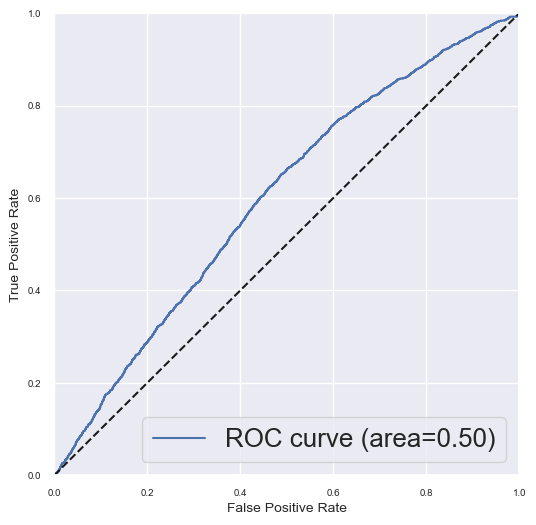

In [71]:
plt.figure(figsize=(6,6), dpi=100)
plt.tick_params(axis='both', which='major', labelsize=7)
fpr, tpr, _ = metrics.roc_curve(y_test_class, class_models['naive_bayes']['probs'])
plt.plot(fpr, tpr, label='ROC curve (area=%0.2f)' % class_models['naive_bayes']['ROC_AUC_test'])
plt.plot([0,1], [0,1], 'k--') # diagonal line
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.show()

# This project ends here, but I would like to dig more into newer methods like ** Intrinsically interpretable (White-Box) models ** and ** Newer Interpretable (Glass-box) Models **

# Intrinsically interpretable (White-Box) models

## Generalized Linear Models

## Linear Regression

In [72]:
coefs_lm = reg_models['linear']['fitted'].coef_
intercept_lm = reg_models['linear']['fitted'].intercept_
print('coefficients:\t%s' % coefs_lm)
print('intercept:\t%s' % intercept_lm)

coefficients:	[-7.79107487e+00  7.79107487e+00  1.73609093e+00 -1.73609093e+00
  1.96413253e-01  2.71331796e-01 -4.67745049e-01 -3.77741197e-02
  4.44529519e-01 -9.19911585e-01  1.82958499e+00 -1.69956031e-01
  2.45162232e-03  3.16647599e-01]
intercept:	11.954751656596656


In [73]:
print('ŷ = %0.2f + %0.4fX₁ + %0.4fX₂ + %0.3fX₃ + ...' %(intercept_lm, coefs_lm[0], coefs_lm[1], coefs_lm[2]))

ŷ = 11.95 + -7.7911X₁ + 7.7911X₂ + 1.736X₃ + ...


In [74]:
pd.DataFrame({'feature':X_train.columns.tolist(), 'coef': coefs_lm.tolist()})

feature      coef
0          onehotencoder__fl_op_yr_2017 -7.791075
1          onehotencoder__fl_op_yr_2018  7.791075
2              onehotencoder__fl_type_I  1.736091
3              onehotencoder__fl_type_N -1.736091
4   onehotencoder__period_day_afternoon  0.196413
5     onehotencoder__period_day_morning  0.271332
6       onehotencoder__period_day_night -0.467745
7             remainder__fl_op_day_in_m -0.037774
8                   remainder__fl_op_mo  0.444530
9                     remainder__is_hub -0.919912
10               remainder__high_season  1.829585
11        remainder__fl_op_day_in_w_num -0.169956
12            remainder__op_fl_time_num  0.002452
13               remainder__delay_ratio  0.316648

In [75]:
linreg_mdl = sm.OLS(y_train_reg, sm.add_constant(X_train))
linreg_mdl = linreg_mdl.fit()
print(linreg_mdl.summary())

                             OLS Regression Results                            
Dep. Variable:     remainder__min_diff   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.019
Method:                  Least Squares   F-statistic:                     101.8
Date:                 Wed, 14 Dec 2022   Prob (F-statistic):          6.32e-231
Time:                         20:07:27   Log-Likelihood:            -2.5347e+05
No. Observations:                57972   AIC:                         5.070e+05
Df Residuals:                    57960   BIC:                         5.071e+05
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [76]:
summary_df = linreg_mdl.summary2().tables[1]
summary_df = summary_df.drop(['const']).reset_index().rename(columns={'index':'feature'})
summary_df['t_abs'] = abs(summary_df['t'])
summary_df.sort_values(by='t_abs', ascending=False).style.format(dict(zip(summary_df.columns[1:], ['{:.4f}']*7))).background_gradient(cmap='plasma_r', low=0, high=0.1, subset=['P>|t|','t_abs'])

## Ridge Regression

In [77]:
coefs_ridge = reg_models['ridge']['fitted'].coef_
coef_ridge_df = pd.DataFrame({'feature':X_train.columns.values.tolist(), 'coef_linear': coefs_lm, 'coef_ridge': coefs_ridge})
coef_ridge_df['coef_regularization'] = coef_ridge_df['coef_linear'] - coef_ridge_df['coef_ridge']
coef_ridge_df.style.background_gradient(cmap='plasma_r', low=0, high=0.1, subset=['coef_regularization'])

In [78]:
num_alphas = 100
alphas = np.logspace(0, 13, num_alphas)
alphas_coefs = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha).fit(X_train, y_train_reg)
    alphas_coefs.append(np.concatenate((ridge.coef_[:8],ridge.coef_[9:])))

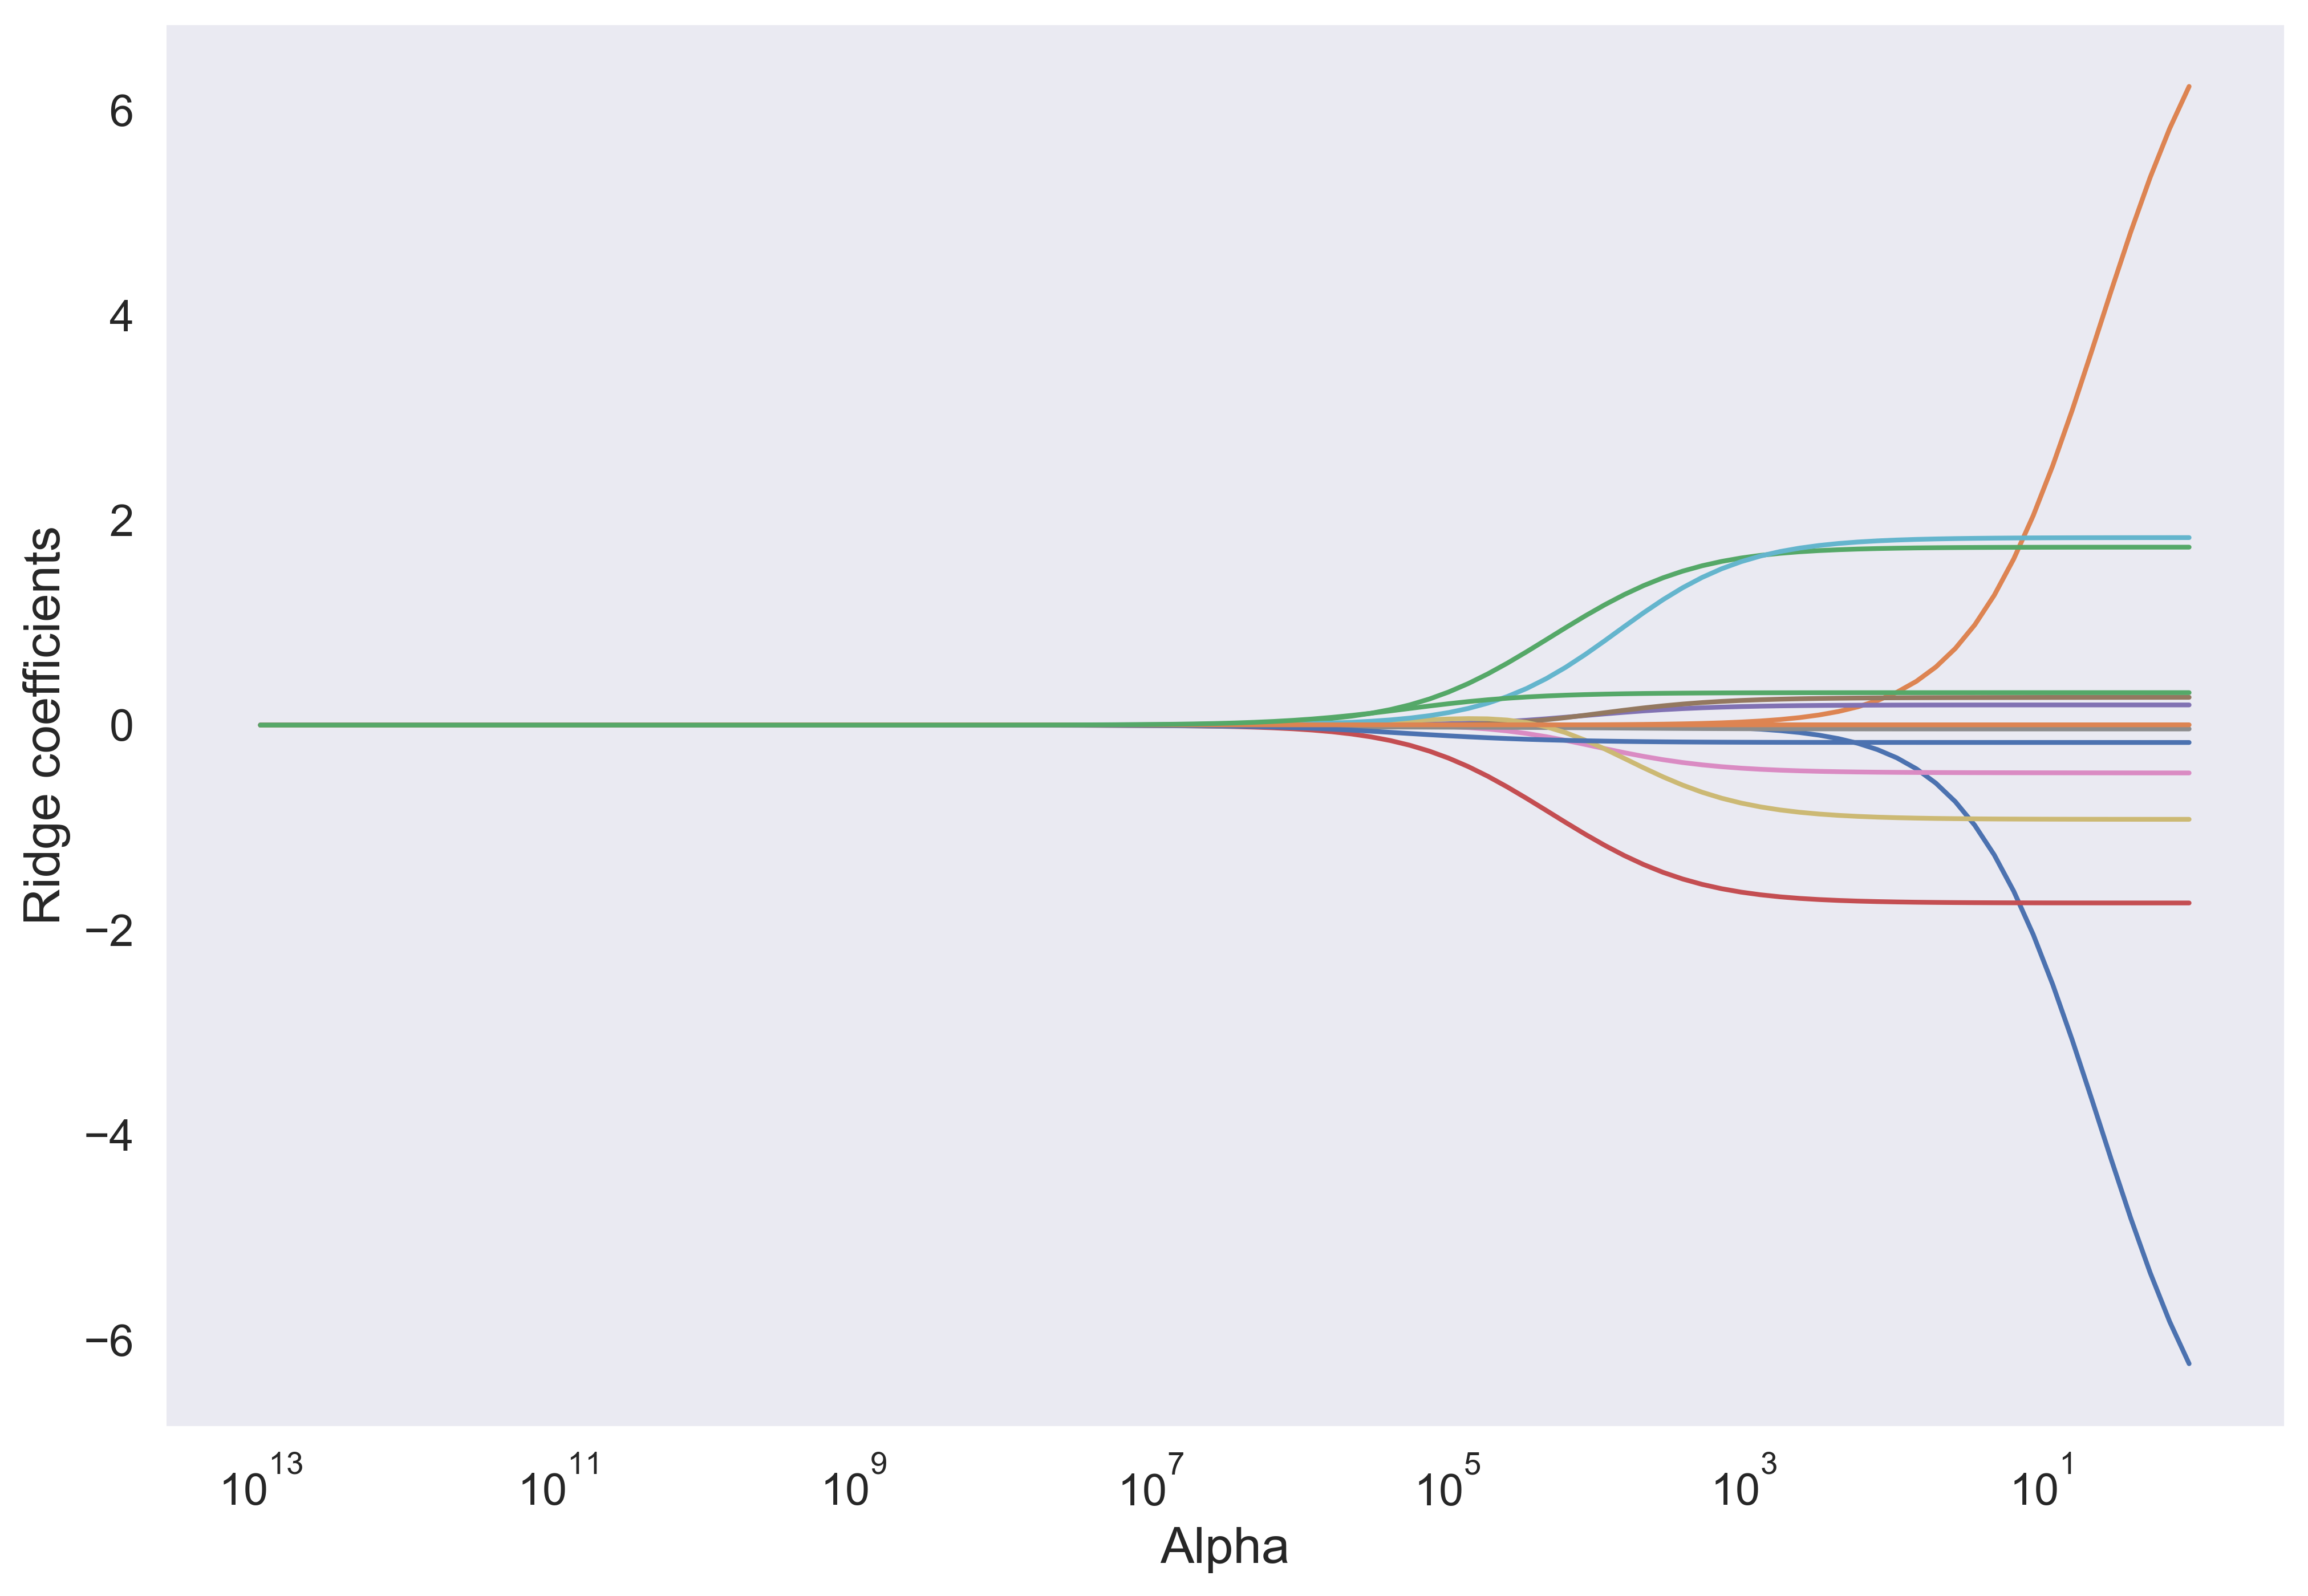

In [79]:
plt.figure(figsize = (12,8), dpi=400)
plt.gca().invert_xaxis()
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.plot(alphas, alphas_coefs)
plt.xscale("log")
plt.xlabel('Alpha', fontsize = 16)
plt.ylabel('Ridge coefficients', fontsize = 16)
plt.grid()
plt.show()

## Polynomial Regression

In [80]:
print(reg_models['linear_poly']['fitted'].get_params()['linearregression'].coef_.shape[0])

680


In [81]:
print(reg_models['linear_interact']['fitted'].get_params()['linearregression'].coef_.shape[0])

106


## Logistic Regression

In [82]:
coefs_log = class_models['logistic']['fitted'].coef_
intercept_log = class_models['logistic']['fitted'].intercept_
print('coefficients:\t%s' % coefs_log)
print('intercept:\t%s' % intercept_log)

coefficients:	[[-8.93271945e-01  7.32651841e-04 -1.09272854e-01 -7.83266439e-01
  -2.73052325e-01 -2.66624460e-01 -3.52862507e-01 -4.96214402e-03
   6.23631400e-02 -2.17147010e-01  2.25002296e-01 -3.05817228e-02
   3.47672329e-04  4.16850849e-01]]
intercept:	[-0.8932316]


In [83]:
stdv = np.std(X_train, 0)
abs(coefs_log.reshape(14,) * stdv).sort_values(ascending=False)

remainder__delay_ratio                 0.740474
onehotencoder__fl_type_N               0.390166
remainder__fl_op_mo                    0.219698
remainder__op_fl_time_num              0.202973
onehotencoder__period_day_night        0.153601
onehotencoder__period_day_afternoon    0.132150
onehotencoder__period_day_morning      0.128840
remainder__is_hub                      0.106994
remainder__high_season                 0.080812
remainder__fl_op_day_in_w_num          0.060940
onehotencoder__fl_type_I               0.054432
remainder__fl_op_day_in_m              0.043593
onehotencoder__fl_op_yr_2017           0.005247
onehotencoder__fl_op_yr_2018           0.000004
dtype: float64

## Decision Trees

### Cart Decision Tree

C:\Users\Farhad\AppData\Local\Temp\ipykernel_31844\1065719380.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


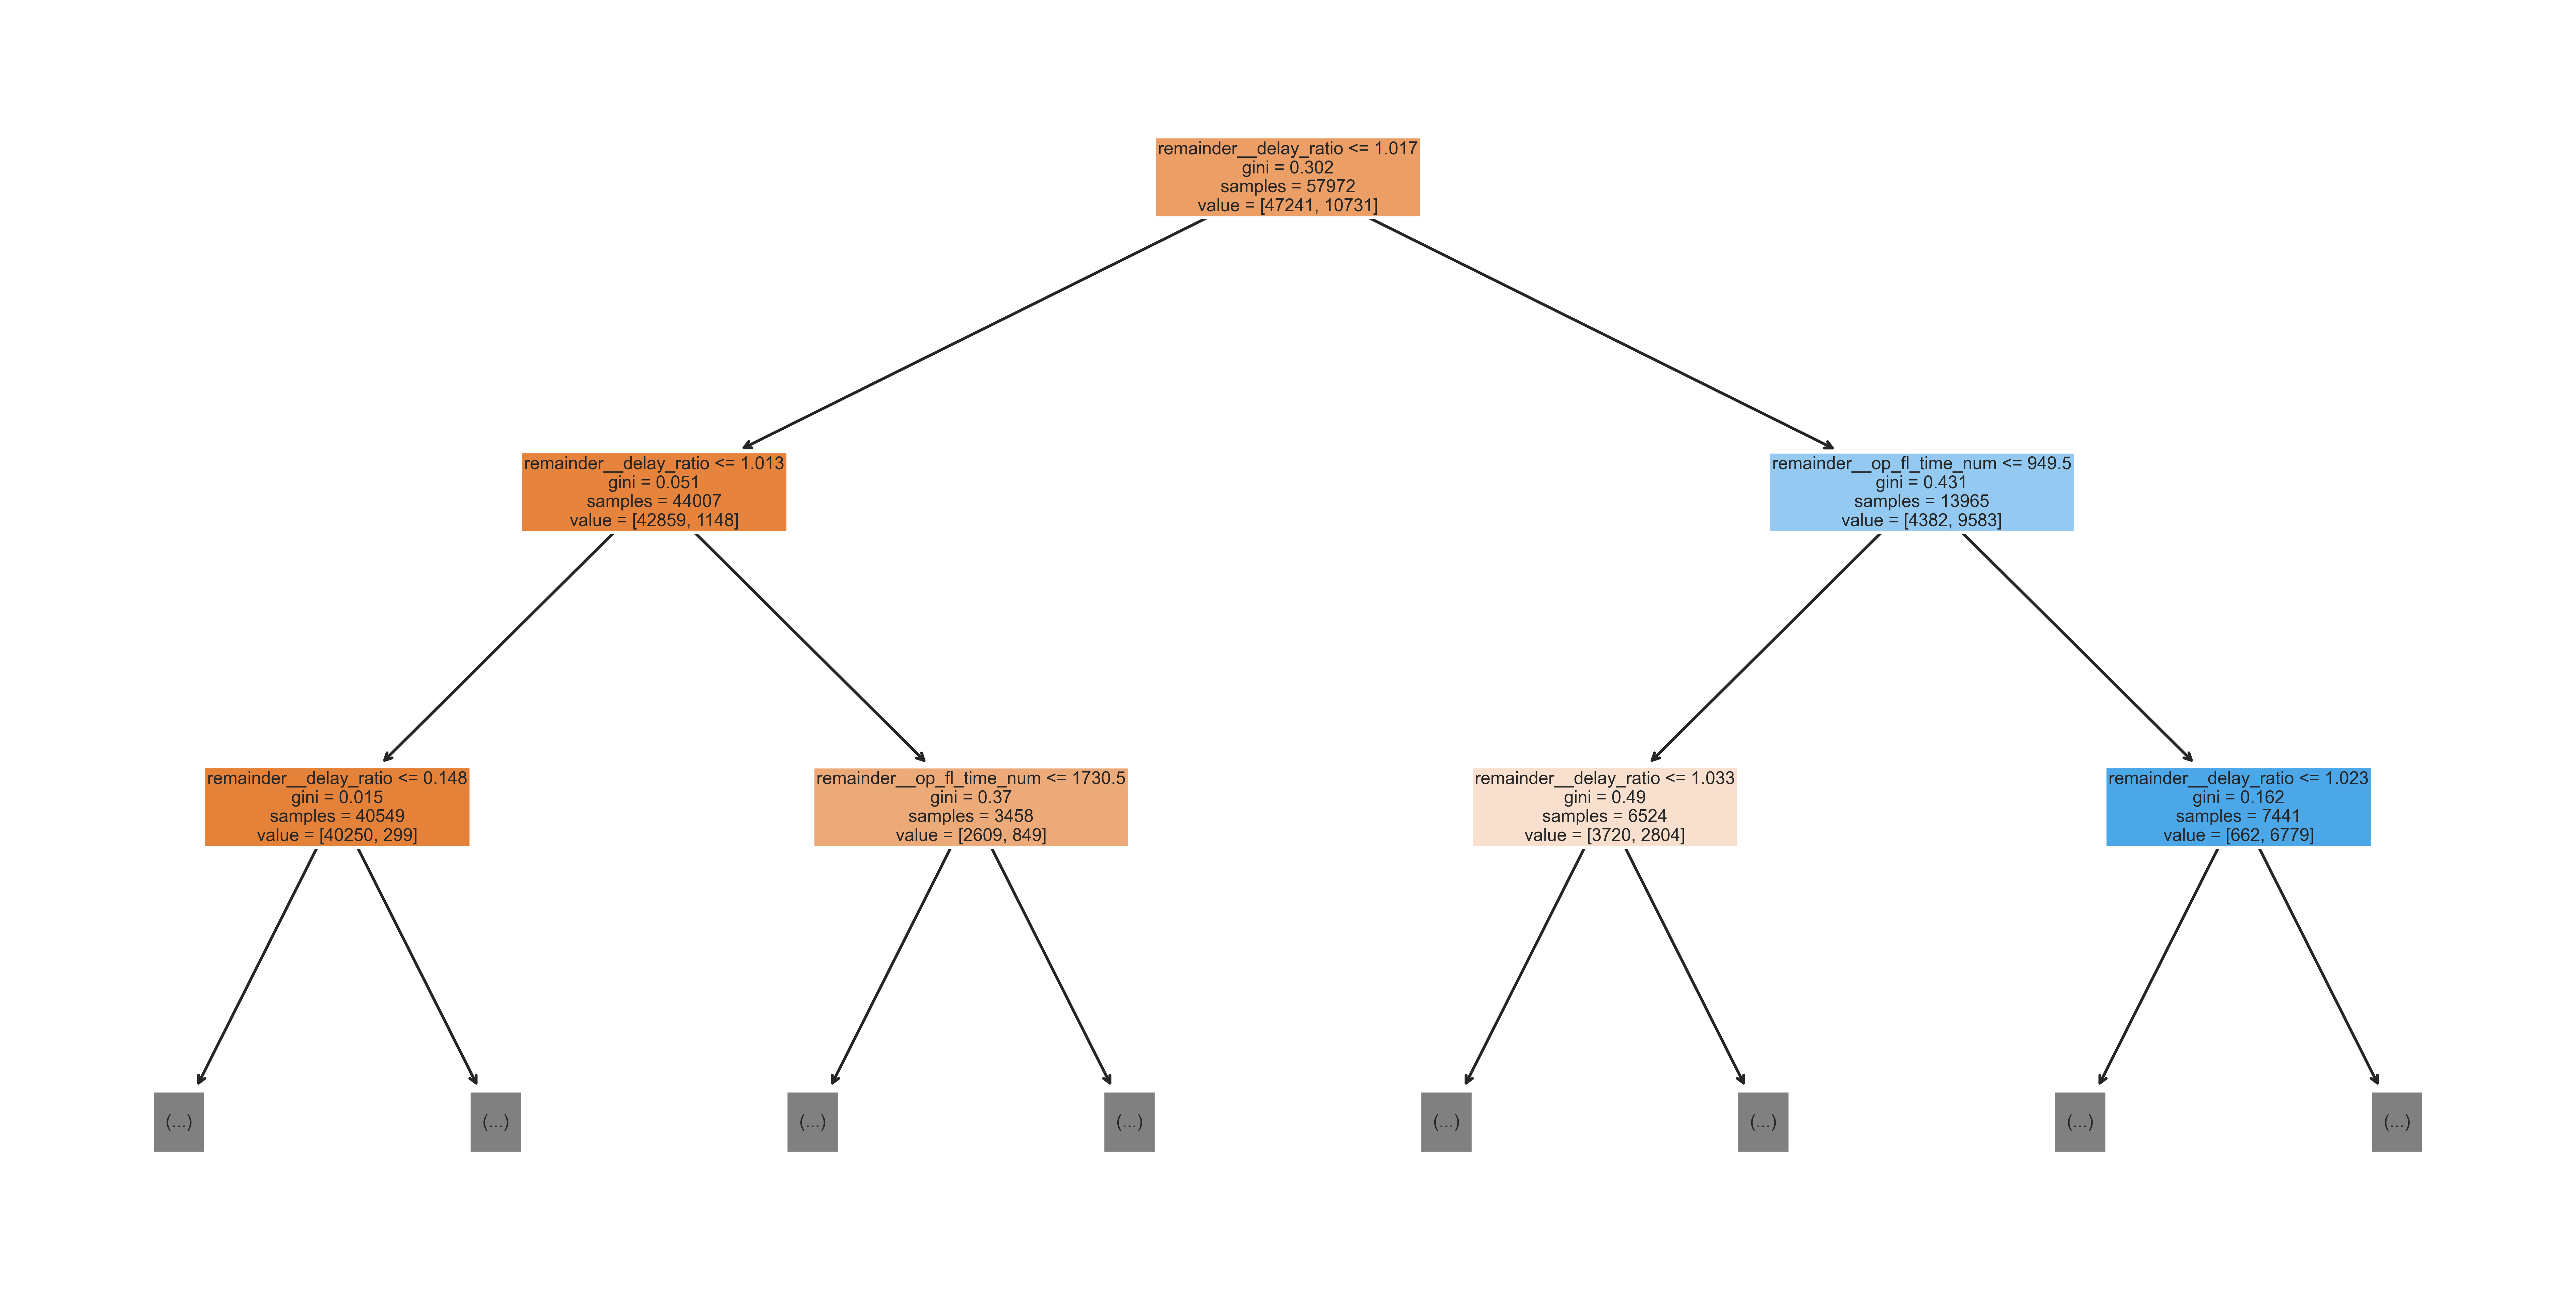

In [84]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8), dpi=600)
tree.plot_tree(class_models['decision_tree']['fitted'], feature_names=X_train.columns.values.tolist(), filled = True, max_depth=2)
fig.show()

In [85]:
text_tree = tree.export_text(class_models['decision_tree']['fitted'], feature_names=X_train.columns.values.tolist())
print(text_tree)

|--- remainder__delay_ratio <= 1.02
|   |--- remainder__delay_ratio <= 1.01
|   |   |--- remainder__delay_ratio <= 0.15
|   |   |   |--- remainder__op_fl_time_num <= 10.50
|   |   |   |   |--- remainder__delay_ratio <= 0.00
|   |   |   |   |   |--- remainder__delay_ratio <= 0.00
|   |   |   |   |   |   |--- remainder__fl_op_day_in_w_num <= 3.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- remainder__fl_op_day_in_w_num >  3.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- remainder__delay_ratio >  0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- remainder__delay_ratio >  0.00
|   |   |   |   |   |--- remainder__fl_op_day_in_w_num <= 3.50
|   |   |   |   |   |   |--- remainder__op_fl_time_num <= 4.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- remainder__op_fl_time_num >  4.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- remainder__fl_op_day_in_w_num >  3.50
|   |   |   |   |   

In [86]:
dt_imp_df = pd.DataFrame({'feature':X_train.columns.values.tolist(), 'importance': class_models['decision_tree']['fitted'].feature_importances_}).sort_values(by='importance', ascending=False)
dt_imp_df

feature  importance
13               remainder__delay_ratio    0.722088
12            remainder__op_fl_time_num    0.277374
11        remainder__fl_op_day_in_w_num    0.000332
8                   remainder__fl_op_mo    0.000109
7             remainder__fl_op_day_in_m    0.000097
0          onehotencoder__fl_op_yr_2017    0.000000
1          onehotencoder__fl_op_yr_2018    0.000000
2              onehotencoder__fl_type_I    0.000000
3              onehotencoder__fl_type_N    0.000000
4   onehotencoder__period_day_afternoon    0.000000
5     onehotencoder__period_day_morning    0.000000
6       onehotencoder__period_day_night    0.000000
9                     remainder__is_hub    0.000000
10               remainder__high_season    0.000000

## RuleFit

In [87]:
rulefit_df = reg_models['rulefit']['fitted'].get_rules()
rulefit_df = rulefit_df[rulefit_df.coef != 0].sort_values(by="importance", ascending=False)
rulefit_df

rule    type          coef  \
13                              remainder__delay_ratio  linear  5.076937e+02   
63   remainder__delay_ratio <= 1.0058152675628662 &...    rule  6.225250e+01   
67   remainder__delay_ratio > 1.116176962852478 & r...    rule  1.948918e+01   
155  remainder__op_fl_time_num <= 228.5 & remainder...    rule -1.502330e+01   
116  remainder__op_fl_time_num > 1708.5 & remainder...    rule  7.257750e+00   
..                                                 ...     ...           ...   
8                                  remainder__fl_op_mo  linear  4.385057e-03   
105        remainder__delay_ratio > 1.0156912803649902    rule  2.073449e-02   
98         remainder__delay_ratio <= 1.042458951473236    rule -2.716424e-02   
83         remainder__delay_ratio <= 1.031447172164917    rule -2.043888e-02   
3                             onehotencoder__fl_type_N  linear -1.580676e-17   

      support    importance  
13   1.000000  1.448973e+01  
63   0.004534  4.182110e+00  
67   0.009715  1.911594e+00  
155  0.014896  1.819896e+00  
116  0.041451  1.446690e+00  
..        ...           ...  
8    1.000000  1.544803e-02  
105  0.250000  8.978297e-03  
98   0.909974  7.774918e-03  
83   0.863990  7.006439e-03  
3    1.000000  7.873764e-18  

[66 rows x 5 columns]

## Nearest Neighbors

### k-Nearest Neighbors (kNN)

In [88]:
print(X_test.iloc[9484,:])

onehotencoder__fl_op_yr_2017              1.000000
onehotencoder__fl_op_yr_2018              0.000000
onehotencoder__fl_type_I                  0.000000
onehotencoder__fl_type_N                  1.000000
onehotencoder__period_day_afternoon       1.000000
onehotencoder__period_day_morning         0.000000
onehotencoder__period_day_night           0.000000
remainder__fl_op_day_in_m                21.000000
remainder__fl_op_mo                       6.000000
remainder__is_hub                         0.000000
remainder__high_season                    0.000000
remainder__fl_op_day_in_w_num             2.000000
remainder__op_fl_time_num              1532.000000
remainder__delay_ratio                    1.002151
Name: 30837, dtype: float64


In [89]:
len(y_test_class)

10231

In [90]:
print(y_test_class.iloc[9484])

0


In [91]:
# print(class_models['knn']['preds'][X_test.iloc[[500]].values.reshape(1,14), 7])

In [92]:
print(class_models['knn']['fitted'].kneighbors(X_test.iloc[[948]].values.reshape(1,14), 7))

(array([[1.00004605, 3.00000019, 3.00000313, 3.31662496, 3.31662496,
        3.31663929, 3.46410178]]), array([[19983, 20001, 45924, 14348,  4549,   953, 47489]], dtype=int64))


C:\Users\Farhad\anaconda3\envs\LATAM_Airlines\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [93]:
print(y_train_class.iloc[[512, 5912,  3409,  850,  744, 7072, 7091]])

57119    0
42143    0
52199    0
33307    0
34138    1
29361    1
42618    0
Name: remainder__min_diff, dtype: int64


In [94]:
print(class_models['knn']['fitted'].effective_metric_)

euclidean


## Naive Bayes


### Gaussian Naive Bayes

In [95]:
print(class_models['naive_bayes']['fitted'].class_prior_)

[0.8148934 0.1851066]


In [96]:
print(class_models['naive_bayes']['fitted'].var_)

[[3.61997862e-04 3.61997862e-04 2.46019426e-01 2.46019426e-01
  2.32851452e-01 2.36620592e-01 1.87530864e-01 7.83899537e+01
  1.24085805e+01 2.44628413e-01 1.26680095e-01 4.00006040e+00
  3.37704865e+05 3.47382758e+00]
 [4.34009533e-04 4.34009533e-04 2.47230203e-01 2.47230203e-01
  2.41083202e-01 2.18610966e-01 1.99420811e-01 7.18344154e+01
  1.19539468e+01 2.34385028e-01 1.40684868e-01 3.84021142e+00
  3.45177238e+05 1.74712347e+00]]


In [97]:
print(class_models['naive_bayes']['fitted'].theta_)

[[9.99978832e-01 2.11680532e-05 4.34262611e-01 5.65737389e-01
  3.67752588e-01 3.82866578e-01 2.49380834e-01 1.57457293e+01
  6.48241993e+00 5.75580534e-01 1.48345717e-01 2.96837493e+00
  1.25607064e+03 1.01656921e+00]
 [9.99906812e-01 9.31879601e-05 5.55772994e-01 4.44227006e-01
  4.03783431e-01 3.21871214e-01 2.74345355e-01 1.56798994e+01
  7.24014537e+00 6.26316280e-01 1.68856584e-01 2.90233902e+00
  1.36354096e+03 1.11852412e+00]]


# Newer Interpretable (Glass-box) Models

## Explainable Boosting Machine(EBM)

In [98]:
feature_samp = ['onehotencoder__fl_op_yr_2017', 'onehotencoder__fl_op_yr_2018',
       'onehotencoder__fl_type_I', 'onehotencoder__fl_type_N',
       'onehotencoder__period_day_afternoon',
       'onehotencoder__period_day_morning', 'onehotencoder__period_day_night',
       'remainder__fl_op_day_in_m', 'remainder__fl_op_mo', 'remainder__is_hub',
       'remainder__high_season', 'remainder__fl_op_day_in_w_num',
       'remainder__op_fl_time_num', 'remainder__delay_ratio']
X_train_abbrev = X_train[feature_samp]
X_test_abbrev = X_test[feature_samp]

#For sampling among observations
sample_size = 0.1
sample_idx = np.random.choice(X_train.shape[0], math.ceil(X_train.shape[0]*sample_size), replace=False)

In [99]:
ebm_mdl = ExplainableBoostingClassifier()
ebm_mdl.fit(X_train_abbrev.iloc[sample_idx], y_train_class.iloc[sample_idx])

ExplainableBoostingClassifier()

In [100]:
show(ebm_mdl.explain_global())

<!-- http://127.0.0.1:7001/2521188284160/ -->

### Local Interpretation

In [101]:
ebm_lcl = ebm_mdl.explain_local(X_test_abbrev.iloc[76:77], y_test_class[76:77], name='EBM')
show(ebm_lcl)

C:\Users\Farhad\AppData\Local\Temp\ipykernel_31844\4197353710.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ebm_lcl = ebm_mdl.explain_local(X_test_abbrev.iloc[76:77], y_test_class[76:77], name='EBM')


<!-- http://127.0.0.1:7001/2523257612032/ -->

#### Performance

In [102]:
ebm_perf = ROC(ebm_mdl.predict_proba).explain_perf(X_test_abbrev, y_test_class, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7001/2521195259360/ -->